![Medical Match company logo](MedicalMatch.svg)

### Problem Statement

**Business Context**:

RN turnover costs a hospital 56k per nurse. The avgerage annual cost of RN turnover is 4.8M per hospital. For every 20 travel RNs eliminated, the avg hospital can save $2M.

MedicalMatch is a medtech startup committed to revolutionizing healthcare staffing. As data scientist on their product solutions team, I am tasked with analyzing hospital employee attrition data to quantify its financial impact on hospitals and clinics. This analysis will enable the marketing team to craft targeted campaigns promoting MedicalMatch’s innovative staffing solutions.


---


### Data Dictionary:

| Feature                     | Type     | Description                                              |
|-----------------------------|----------|----------------------------------------------------------|
| **age**                     | *int64*  | Age of employee. 1: >30, 2: 30-34, 3: 35-39, 4: 40-44, 5: 45-49, 6: 50-54, 7: 55-59, 8: 60-64, 9: 65+                                       |
| **attrition**               | *int64*  | Did the employee leave the hospital 0: No, 1: Yes       |
| **distancefromhome**        | *int64*  | Distance from home in minutes                            |
| **education**               | *int64*  | 1: High School/GED, 2: Trade/Associate, 3: Bachelor, 4: Master, 5: Doctorate |
| **environmentalsatisfaction** | *int64* | 1: Low, 2: Medium, 3: High, 4: Very High                |
| **gender**                  | *object*  | Female, Male                                     |
| **hourlyrate**              | *float64*| Hourly pay per US BLS May 2024                          |
| **jobinvolvement**          | *int64*  | 1: Low, 2: Medium, 3: High, 4: Very High                |
| **jobrole**                 | *object* | Current job title                                       |
| **jobsatisfaction**         | *int64*  | 1: Low, 2: Medium, 3: High, 4: Very High                |
| **maritalstatus**           | *object* | Single, Married, Divorced                               |
| **monthlyincome**           | *float64*| Monthly pay per US BLS May 2024                         |
| **numcompaniesworked**      | *int64*  | Number of previous jobs                                 |
| **overtime**                | *int64*  | Did employee work overtime: No: 0, Yes: 1              |
| **percentsalaryhike**       | *int64*  | Percent of raise                                        |
| **performancerating**       | *int64*  | 1: Poor, 2: Good, 3: Excellent, 4: Outstanding          |
| **relationshipsatisfaction**| *int64*  | 1: Low, 2: Medium, 3: High, 4: Very High                |
| **shift**                   | *int64*  | Current shift. 1: 12 hr day, 2: 12 hr night, 3: 8 hr day, 4: 8 hr evening |
| **totalworkingyears**       | *int64*  | How many years employee has worked                      |
| **trainingtimeslastyear**   | *int64*  | How many training events employee had last year          |
| **worklifebalance**         | *int64*  | 1: Poor, 2: Moderate, 3: Good, 4: Excellent            |
| **yearsatcompany**          | *int64*  | Total years at current company                          |
| **yearsincurrentrole**      | *int64*  | Total years in current role                             |
| **yearssincelastpromotion** | *int64*  | Length of time in years since last promotion            |
| **yearswithcurrmanager**    | *int64*  | How long employee has been with the same manager        |




#### Project Datasets

Synthetic data taken from:
- https://excelbianalytics.com/wp/downloads-21-sample-csv-files-data-sets-for-testing-till-5-million-records-hr-analytics-for-attrition/ and modified to be applicable to hospital attrition

- final-healthcare.csv

#### Additional Resources
- https://www.uschamber.com/workforce/nursing-workforce-data-center-a-national-nursing-crisis

- https://www.nsinursingsolutions.com/Documents/Library/NSI_National_Health_Care_Retention_Report.pdf

- Bureau of Labor Statistics: https://www.bls.gov/

- National Library of Medicine: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2761533/

- https://www.relias.com/blog/cna-turnover-costs-for-skilled-nursing-facilities#:~:text=To%20replace%20a%20CNA%2C%20an,Post%2DAcute%20Care%20at%20Relias.


#### Import libraries

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [210]:
# load google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Import the dataset

In [450]:
# read in the dataset
final = pd.read_csv('/content/drive/MyDrive/DSML/GA_DS/Projects/Project-Capstone/medical match option/data/final-healthcare.csv')

## Sanity Checks

In [212]:
# first peak at the data
final.sample(10)

,age,attrition,distancefromhome,education,environmentsatisfaction,gender,hourlyrate,jobinvolvement,jobrole,jobsatisfaction,...,performancerating,relationshipsatisfaction,shift,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
36326,9,0,21,5,4,Female,60.71,3,CNA,2,...,3,4,3,19,2,1,16,14,1,3
36554,9,0,47,2,3,Female,42.59,4,CNA,4,...,2,4,2,20,2,4,12,7,1,7
45763,2,1,15,5,4,Female,46.62,3,pharmacist,4,...,2,1,1,25,3,1,22,6,1,12
49210,4,0,10,3,3,Female,45.25,2,surgery RN,4,...,4,4,3,10,4,1,10,7,0,4
59888,8,0,10,4,1,Female,50.39,2,ICU nurse,4,...,3,2,2,1,2,3,1,1,4,2
21357,6,0,49,5,4,Male,58.96,2,surgery tech,3,...,3,3,2,5,3,3,21,14,1,3
29899,7,0,16,5,4,Male,54.47,3,ICU nurse,3,...,3,4,3,6,2,2,16,3,0,0
17483,9,1,1,2,3,Female,45.40,3,CNA,4,...,3,4,2,6,2,4,1,1,4,9
52835,5,0,2,5,3,Male,162.89,3,ED nurse,3,...,2,3,1,11,2,3,11,5,0,7
46538,2,0,34,2,2,Male,71.05,3,surgery tech,3,...,2,3,2,7,2,3,1,1,1,2


In [213]:
# check out dtypes
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       60000 non-null  int64  
 1   attrition                 60000 non-null  int64  
 2   distancefromhome          60000 non-null  int64  
 3   education                 60000 non-null  int64  
 4   environmentsatisfaction   60000 non-null  int64  
 5   gender                    60000 non-null  object 
 6   hourlyrate                60000 non-null  float64
 7   jobinvolvement            60000 non-null  int64  
 8   jobrole                   60000 non-null  object 
 9   jobsatisfaction           60000 non-null  int64  
 10  maritalstatus             60000 non-null  object 
 11  monthlyincome             60000 non-null  float64
 12  numcompaniesworked        60000 non-null  int64  
 13  overtime                  60000 non-null  int64  
 14  percen

In [214]:
# checking shape of the data
print("There are", final.shape[0], 'rows and', final.shape[1], "columns.")

There are 60000 rows and 25 columns.


In [215]:
# what does the statistical summary look like?
final.describe().T

,count,mean,std,min,25%,50%,75%,max
age,60000.0,5.251483,2.504452,1.00,3.00,5.000,8.0000,9.00
attrition,60000.0,0.294583,0.455859,0.00,0.00,0.000,1.0000,1.00
distancefromhome,60000.0,16.309900,14.922100,1.00,3.00,10.000,28.0000,50.00
education,60000.0,3.148933,1.483382,1.00,2.00,3.000,5.0000,5.00
environmentsatisfaction,60000.0,2.879850,1.070560,1.00,2.00,3.000,4.0000,4.00
hourlyrate,60000.0,61.725356,42.398405,9.86,34.18,50.480,68.1900,189.98
jobinvolvement,60000.0,2.642517,0.787422,1.00,2.00,3.000,3.0000,4.00
jobsatisfaction,60000.0,3.131967,0.858738,1.00,3.00,3.000,4.0000,4.00
monthlyincome,60000.0,9353.932001,6028.551764,1707.03,4987.89,7547.425,11444.0275,29002.16
numcompaniesworked,60000.0,3.242700,1.876590,0.00,2.00,3.000,4.0000,8.00


**Observations:**

- Unsurprisingling, both hourly rate and monthly income are right skewed.
- Total working years is also right skewed. This is not a surprise as we know that over 30% of hospital staff, doctors and nurses specifically, are over 55 yrs old.
- Most other features have a pretty normal distribution

In [216]:
# get summary statistics for object columns
final.describe(include='object').T

,count,unique,top,freq
gender,60000,2,Female,40470
jobrole,60000,10,CNA,12000
maritalstatus,60000,3,Married,35394


In [217]:
# check for missing values
final.isna().sum()

age                         0
attrition                   0
distancefromhome            0
education                   0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
numcompaniesworked          0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
shift                       0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssincelastpromotion     0
yearswithcurrmanager        0
dtype: int64

In [218]:
# check for duplicates
final.duplicated().sum()

0

**Dataset Observations:**
- Column count:
    - 21 Int64
    - 2  float 64
    - 2 Object
- Row count: 60,000
- No missing values or duplicates
- Target columns is Attrition:
    - No: 0
    - Yes: 1

## Univariate EDA

#### Univariate Utility Functions

In [219]:
# Function to plot a boxplot and a histogram along the same scale.
# This function comes from a previous notebook I did with Univ Texas.
# I've modified it to apply to this dataset
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="lightgreen"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="blue"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.legend(["Mean", "Median"])
    plt.title(feature.upper(), fontsize=14)
    plt.show()

In [220]:
# Function to create labeled barplots
# This function comes from a previous notebook I did with Univ Texas.
# I've modified it to apply to this dataset
def labeled_barplot(data, feature, title=None, xlabel=None, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    title: title of the plot (default is None)
    xlabel: label for the x-axis (default is None)
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="YlGnBu",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    if title:
        plt.title(title, fontsize=14)
    else:
        plt.title(feature.upper(), fontsize=14)

    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    else:
        plt.xlabel(feature.capitalize(), fontsize=12)

    plt.xticks(rotation=0, fontsize= 10)
    plt.ylabel(f"Count", fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle= '--', alpha= 0.7)
    plt.show()  # show the plot

### Age Analysis

In [221]:
final['age'].unique()

array([6, 9, 1, 2, 3, 5, 4, 7, 8])

In [222]:
final['age'].value_counts(normalize=True)

age
3    0.142783
9    0.139333
2    0.136950
5    0.116617
8    0.115267
7    0.112150
4    0.111633
6    0.086633
1    0.038633
Name: proportion, dtype: float64

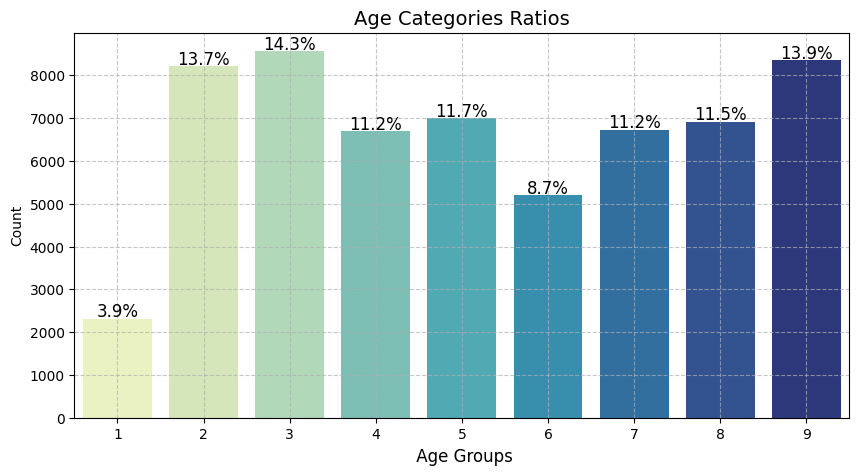

In [223]:
labeled_barplot(final, 'age', perc= True, title= "Age Categories Ratios", xlabel= " Age Groups")

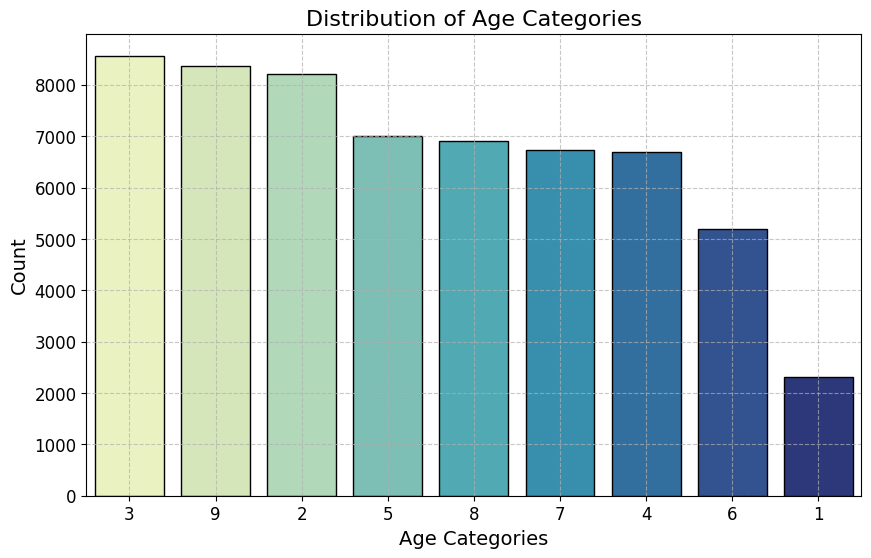

In [224]:
# get counts for each age
# sortin descending order
age_counts = final['age'].value_counts().sort_values(ascending=False)

# sorted age values based on their counts
sorted_ages = age_counts.index.tolist()

# distribution of age with sorted counts
plt.figure(figsize=(10, 6))
sns.countplot(data=final, x='age', order=sorted_ages, palette="YlGnBu", edgecolor='black')
plt.title('Distribution of Age Categories', fontsize=16)
plt.xlabel('Age Categories', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Attrition Univariate Analysis

In [225]:
final['attrition'].value_counts(normalize=True)

attrition
0    0.705417
1    0.294583
Name: proportion, dtype: float64

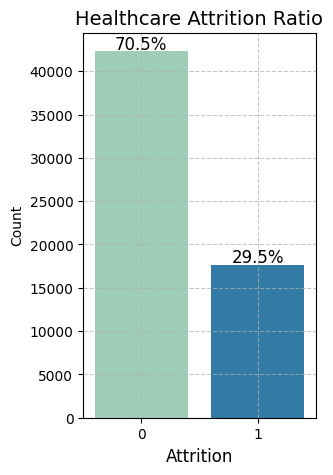

In [226]:
labeled_barplot(final, 'attrition', perc= True, title= 'Healthcare Attrition Ratio', xlabel= 'Attrition')

**Observations:**

Healthcare has a higher than normal attrition rate as we see confirmed with this dataset. Almost 30% of hospital staff turn over

### Distance From Home (Miles): Analysis

In [227]:
# distance counts
final['distancefromhome'].describe()

count    60000.0000
mean        16.3099
std         14.9221
min          1.0000
25%          3.0000
50%         10.0000
75%         28.0000
max         50.0000
Name: distancefromhome, dtype: float64

In [228]:
# distances as percents
final['distancefromhome'].value_counts(normalize=True)

distancefromhome
1     0.114117
2     0.099450
8     0.063850
7     0.063583
3     0.060617
9     0.057950
10    0.049183
16    0.030817
25    0.012200
32    0.012000
24    0.011617
34    0.011567
44    0.011467
42    0.011433
40    0.011433
20    0.011400
13    0.011250
30    0.011250
47    0.011233
18    0.011217
48    0.011200
12    0.011183
14    0.011167
27    0.011117
11    0.011100
50    0.011050
15    0.011017
38    0.011017
26    0.011000
33    0.010983
28    0.010967
22    0.010950
6     0.010950
41    0.010917
29    0.010867
19    0.010850
39    0.010850
21    0.010733
43    0.010700
23    0.010700
5     0.010667
46    0.010650
31    0.010617
35    0.010517
37    0.010233
4     0.010217
49    0.010117
17    0.010050
36    0.010033
45    0.009950
Name: proportion, dtype: float64

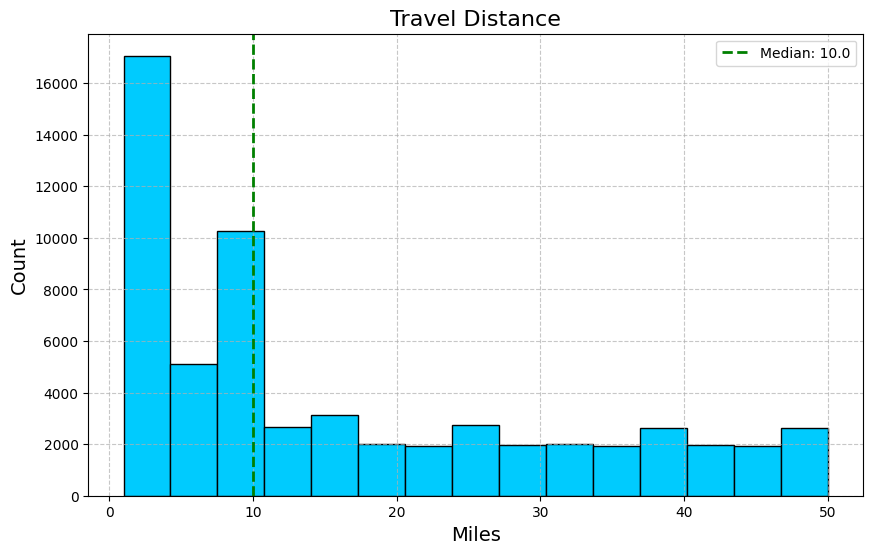

In [229]:
# median of the distance
median_distance = final['distancefromhome'].median()

# histogram of distance from home
plt.figure(figsize=(10, 6))
plt.hist(final['distancefromhome'], bins= 15, color='#00CBFE', edgecolor='black')

# vertical line for the median
plt.axvline(x=median_distance, color='green', linestyle='--', linewidth=2, label=f'Median: {median_distance}')

# labels
plt.xlabel('Miles', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Travel Distance', fontsize=16)

# legend
plt.legend()

# grid
plt.grid(True, linestyle='--', alpha=0.7)

# show plot
plt.show()

### Education Analysis

In [230]:
final['education'].value_counts()

education
2    22932
5    20566
3     7055
1     6237
4     3210
Name: count, dtype: int64

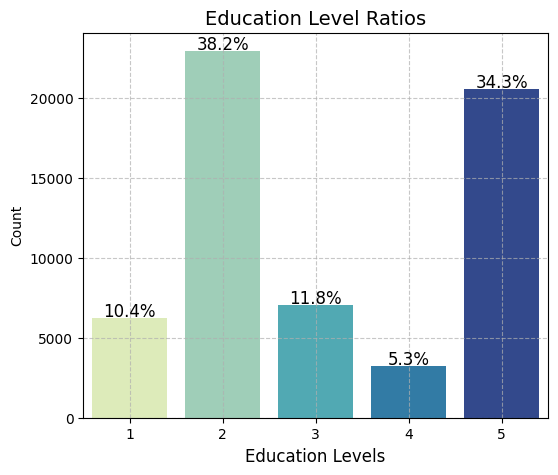

In [231]:
labeled_barplot(final, 'education', perc= True, title= 'Education Level Ratios', xlabel= 'Education Levels')

### Environmental Satisfaction Analysis

In [232]:
final['environmentsatisfaction'].value_counts(normalize= True)

environmentsatisfaction
4    0.360000
3    0.320033
1    0.160183
2    0.159783
Name: proportion, dtype: float64

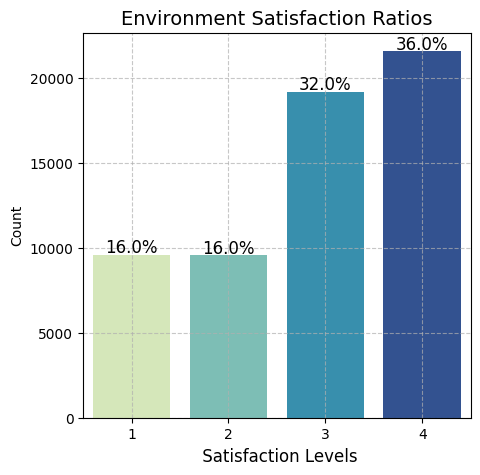

In [233]:
labeled_barplot(final, 'environmentsatisfaction', perc= True,  title= 'Environment Satisfaction Ratios', xlabel= ' Satisfaction Levels')

### Gender Analysis

In [234]:
final['gender'].value_counts(normalize= True)

gender
Female    0.6745
Male      0.3255
Name: proportion, dtype: float64

<Figure size 800x600 with 0 Axes>

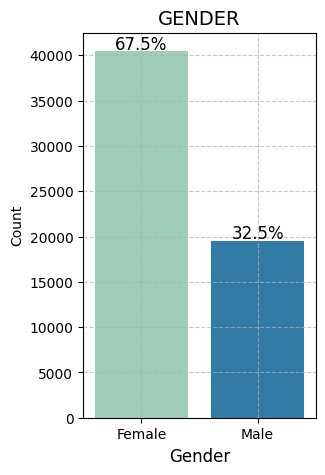

In [235]:
plt.figure(figsize=(8, 6))
labeled_barplot(final, 'gender', perc= True);

### Hourly Rate Analysis

In [236]:
final['hourlyrate'].describe()

count    60000.000000
mean        61.725356
std         42.398405
min          9.860000
25%         34.180000
50%         50.480000
75%         68.190000
max        189.980000
Name: hourlyrate, dtype: float64

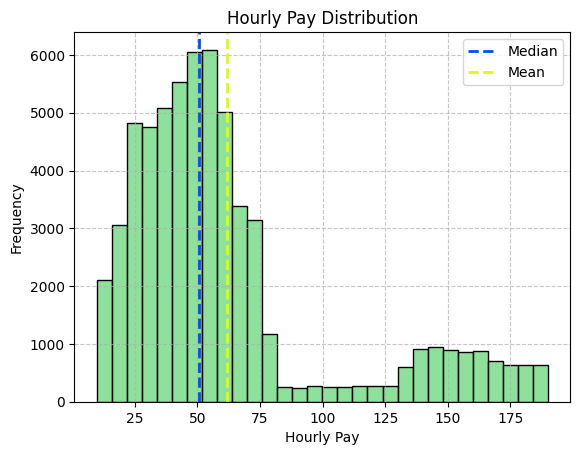

In [237]:
sns.histplot(final['hourlyrate'], bins=30, color= '#68D87A', edgecolor='black')
plt.xlabel('Hourly Pay')
plt.ylabel('Frequency')
plt.title('Hourly Pay Distribution')
# get median and mean
med_hr = final['hourlyrate'].median()
mean_hr = final['hourlyrate'].mean()

# add median and mean lines
plt.axvline(med_hr, color='#004DFE', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_hr, color='#DFFF00', linestyle='dashed', linewidth=2, label='Mean')

# legend
plt.legend()
# grid
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

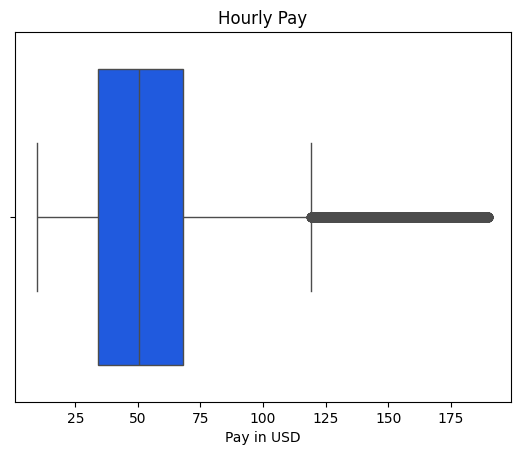

In [238]:
sns.boxplot(x=final['hourlyrate'], color= '#004DFE')
plt.title('Hourly Pay')
plt.xlabel('Pay in USD')
plt.show()

### Job Involvement Analysis

In [239]:
final['jobinvolvement'].value_counts(normalize= True)

jobinvolvement
3    0.544433
2    0.260400
4    0.097750
1    0.097417
Name: proportion, dtype: float64

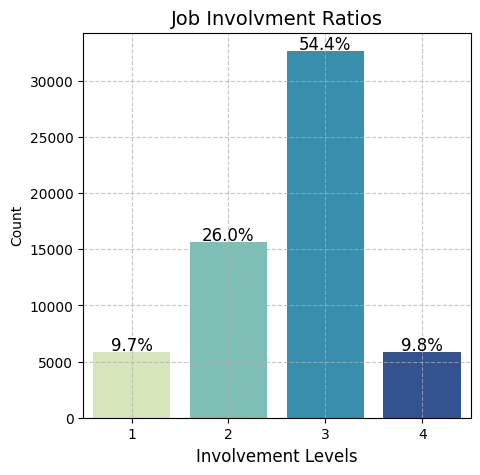

In [240]:
labeled_barplot(final, 'jobinvolvement', perc= True, title= 'Job Involvment Ratios', xlabel= 'Involvement Levels')

### Job Role Analysis

In [241]:
final['jobrole'].value_counts(normalize= True)

jobrole
CNA             0.20
ICU nurse       0.15
surgeon         0.12
ICU Dr          0.12
ED nurse        0.10
surgery tech    0.07
ED tech         0.07
surgery RN      0.07
ICU tech        0.05
pharmacist      0.05
Name: proportion, dtype: float64

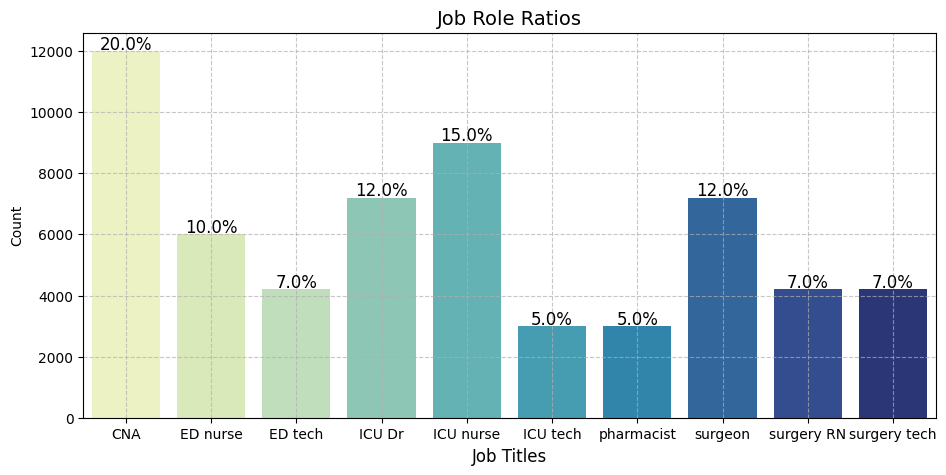

In [242]:
labeled_barplot(final, 'jobrole', perc= True, title= 'Job Role Ratios', xlabel= 'Job Titles')

### Job Satisfaction Analysis

In [243]:
final['jobsatisfaction'].value_counts(normalize= True)

jobsatisfaction
3    0.439567
4    0.378600
2    0.117033
1    0.064800
Name: proportion, dtype: float64

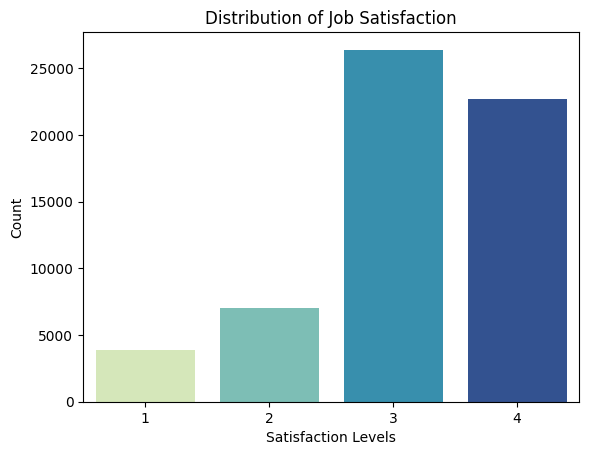

In [244]:
# bar plot of job involvement
sns.countplot(x = 'jobsatisfaction', data = final, palette="YlGnBu")
plt.xlabel('Satisfaction Levels')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction')
plt.show()

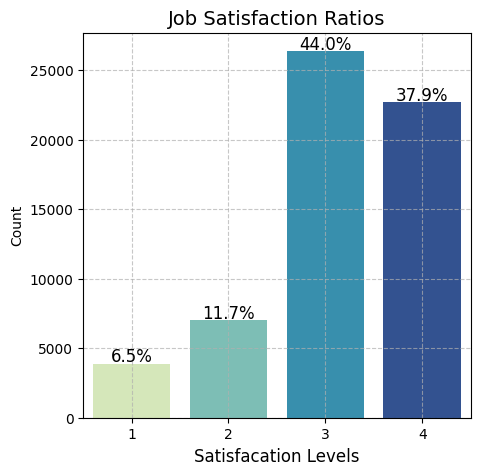

In [245]:
labeled_barplot(final, 'jobsatisfaction', perc= True, title= 'Job Satisfaction Ratios', xlabel= 'Satisfacation Levels')

**Observations:**

- Job Satisfaction and Enviroment Satisfaction share the same high level of satisfact. This isn't surprising, as they both give us essentially the same information. It would be a good idea to drop one of these columns.

### Marital Status Analysis

In [246]:
final['maritalstatus'].value_counts()

maritalstatus
Married     35394
Divorced    19954
Single       4652
Name: count, dtype: int64

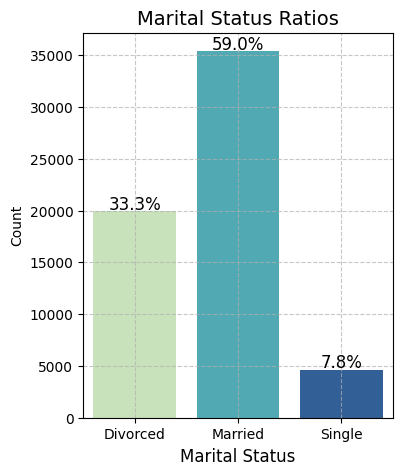

In [247]:
labeled_barplot(final, 'maritalstatus', perc= True, title= 'Marital Status Ratios', xlabel= 'Marital Status')

### Monthly Income Analysis

In [248]:
final['monthlyincome'].describe()

count    60000.000000
mean      9353.932001
std       6028.551764
min       1707.030000
25%       4987.890000
50%       7547.425000
75%      11444.027500
max      29002.160000
Name: monthlyincome, dtype: float64

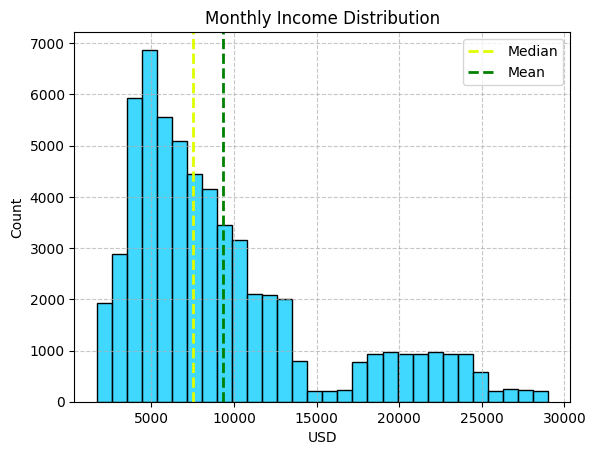

In [249]:
# histplot of monthly income
sns.histplot(final['monthlyincome'], bins=30, color= '#00CBFE', edgecolor='black')
plt.xlabel('USD')
plt.ylabel('Count')
plt.title('Monthly Income Distribution')

# get median and mean
med_inc = final['monthlyincome'].median()
mean_inc = final['monthlyincome'].mean()

# add median and mean lines
plt.axvline(med_inc, color='#DFFF00', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_inc, color='green', linestyle='dashed', linewidth=2, label='Mean')

# legend
plt.legend()
# grid
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

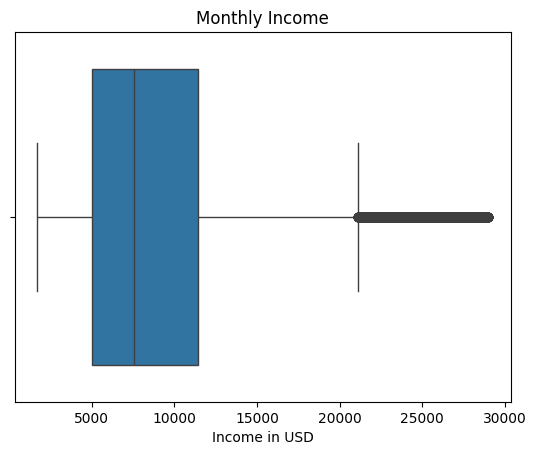

In [250]:
sns.boxplot(x=final['monthlyincome'])
plt.title('Monthly Income')
plt.xlabel('Income in USD')
plt.show()

### Number of Companies Worked Analysis

In [251]:
final['numcompaniesworked'].value_counts(normalize= True)

numcompaniesworked
4    0.252733
3    0.184833
1    0.152800
2    0.116133
5    0.107467
6    0.071667
0    0.071017
7    0.021933
8    0.021417
Name: proportion, dtype: float64

In [252]:
med_num = final['numcompaniesworked'].median()
med_num

3.0

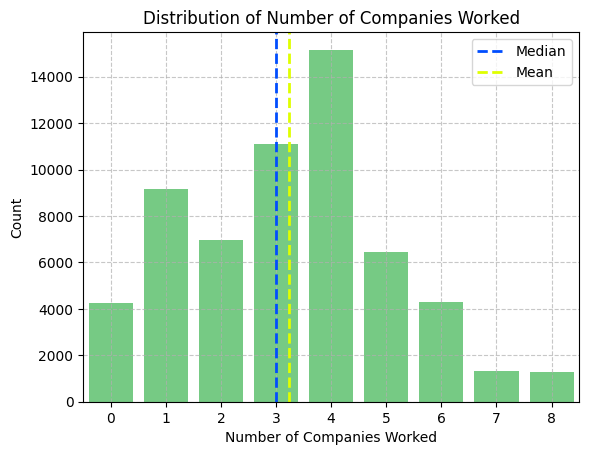

In [253]:
# bar plot of numcompaniesworked
sns.countplot(x = 'numcompaniesworked', data = final, color= '#68D87A')

#median/mean number of companies worked
med_num = final['numcompaniesworked'].median()
mean_num = final['numcompaniesworked'].mean()
plt.axvline(med_num, color='#004DFE', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_num, color='#DFFF00', linestyle='dashed', linewidth=2, label='Mean')

# labels
plt.xlabel('Number of Companies Worked')
plt.ylabel('Count')
plt.title('Distribution of Number of Companies Worked')

# grid
plt.grid(True, linestyle='--', alpha=0.7)

# legend
plt.legend()
plt.show()

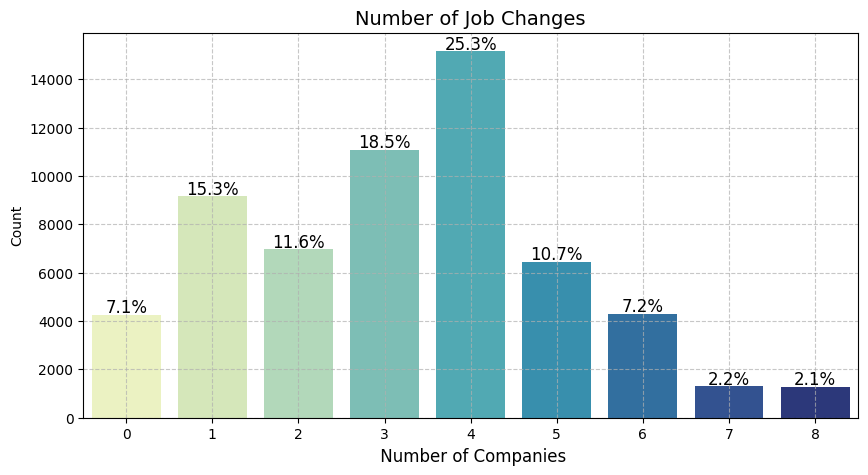

In [254]:
labeled_barplot(final, 'numcompaniesworked', perc= True, title= 'Number of Job Changes', xlabel= ' Number of Companies' )

**Job Change Observations**

- More than 22% of hospital staff have worked at 5+ companies.

**Recommendations:**
This level of turnover illustrates a market need for MedicalMatch's staffing solutions.

- Per the American Medical Association, the costs to replace a doctor is $500k-1M per doctor from recruitment costs, sign-on bonuses, lost billings and onboarding costs. Not to mention indirect costs such as medical errors, higher malpractice risks, etc.
    - Example: If nothing is done to address burnout, Stanford Medicine projects that they could lose up to 60 physicians, a cost ranging from $15.5M-55.5M depending on the specialties of the physicians

- Per the National Health Care Retention & RN Staffing Report, the cost to replace one nurse is $56k.
    - Example: Per NSI for every 20 travel nurses eliminated, the average hospital can save $2M

### Overtime Analysis

In [255]:
final['overtime'].value_counts(normalize= True)

overtime
0    0.748367
1    0.251633
Name: proportion, dtype: float64

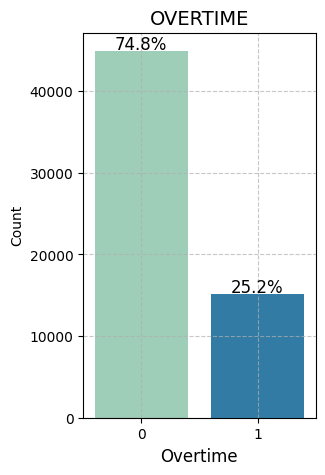

In [256]:
labeled_barplot(final, 'overtime', perc= True)

### Percent Salary Hike Analysis

In [257]:
final['percentsalaryhike'].describe()

count    60000.000000
mean        24.617967
std         14.410686
min          0.000000
25%         12.000000
50%         25.000000
75%         37.000000
max         49.000000
Name: percentsalaryhike, dtype: float64

In [258]:
final['percentsalaryhike'].value_counts(normalize= True)

percentsalaryhike
12    0.020967
11    0.020917
44    0.020900
47    0.020900
32    0.020833
45    0.020717
43    0.020700
20    0.020567
42    0.020500
13    0.020483
27    0.020417
23    0.020333
17    0.020233
36    0.020200
26    0.020200
38    0.020200
41    0.020200
30    0.020200
3     0.020183
16    0.020167
15    0.020167
9     0.020167
33    0.020117
40    0.020100
28    0.020100
25    0.020083
0     0.020050
37    0.020000
24    0.020000
18    0.019933
49    0.019900
4     0.019900
14    0.019783
22    0.019767
39    0.019683
6     0.019650
19    0.019617
46    0.019617
34    0.019567
48    0.019550
21    0.019500
35    0.019467
8     0.019433
10    0.019400
2     0.019317
5     0.019267
29    0.019267
31    0.019217
7     0.018800
1     0.018767
Name: proportion, dtype: float64

### Performance Rating Analysis

In [259]:
final['performancerating'].value_counts(normalize= True)

performancerating
3    0.483783
4    0.188183
1    0.170817
2    0.157217
Name: proportion, dtype: float64

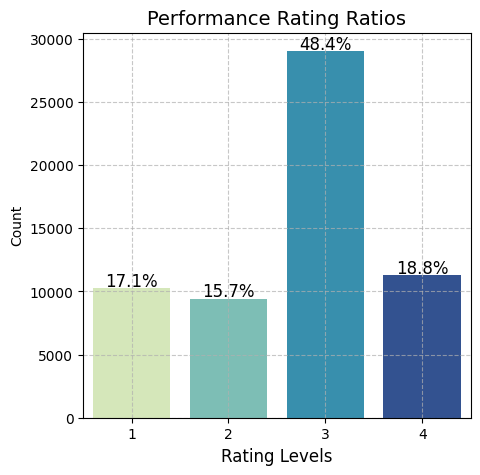

In [260]:
labeled_barplot(final, 'performancerating', perc= True, title= 'Performance Rating Ratios', xlabel= 'Rating Levels')

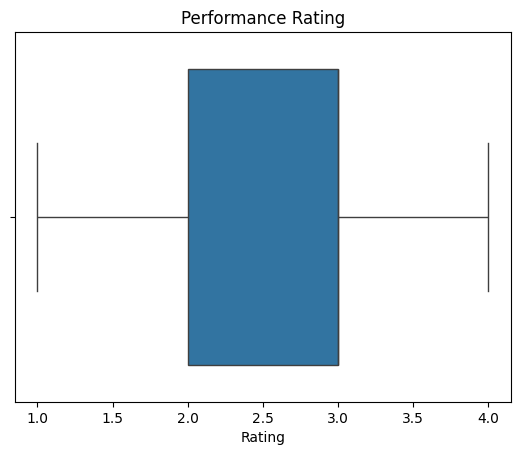

In [261]:
sns.boxplot(x=final['performancerating'])
plt.title('Performance Rating')
plt.xlabel('Rating')
plt.show()

### Relationship Satisfaction Analysis

In [262]:
final['relationshipsatisfaction'].value_counts(normalize= True)

relationshipsatisfaction
4    0.362400
3    0.289100
2    0.233167
1    0.115333
Name: proportion, dtype: float64

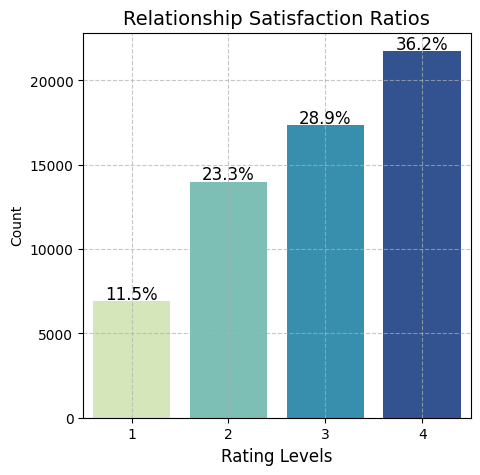

In [263]:
labeled_barplot(final, 'relationshipsatisfaction', perc= True, title= 'Relationship Satisfaction Ratios', xlabel= 'Rating Levels')

### Shift Analysis

In [264]:
final['shift'].value_counts(normalize= True)

shift
2    0.323333
1    0.318817
3    0.188400
4    0.169450
Name: proportion, dtype: float64

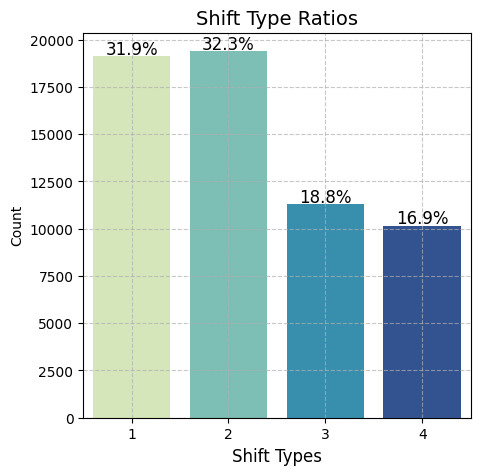

In [265]:
labeled_barplot(final, 'shift', perc= True, title= 'Shift Type Ratios', xlabel= 'Shift Types')

### Total Working Years Analysis

In [266]:
final['totalworkingyears'].describe()

count    60000.000000
mean        16.081233
std         11.176452
min          1.000000
25%          8.000000
50%         10.000000
75%         25.000000
max         40.000000
Name: totalworkingyears, dtype: float64

In [267]:
final['totalworkingyears'].value_counts(normalize= True)

totalworkingyears
10    0.112500
6     0.086283
8     0.077883
9     0.077050
5     0.074933
35    0.017400
40    0.017133
12    0.017050
16    0.016983
2     0.016917
27    0.016800
39    0.016767
20    0.016750
14    0.016717
3     0.016683
32    0.016683
26    0.016667
15    0.016617
37    0.016600
7     0.016567
13    0.016433
33    0.016333
11    0.016333
22    0.016267
28    0.016217
25    0.016133
4     0.016017
19    0.015983
23    0.015983
1     0.015950
30    0.015933
29    0.015917
17    0.015900
34    0.015883
18    0.015867
38    0.015833
31    0.015783
24    0.015600
21    0.015567
36    0.015083
Name: proportion, dtype: float64

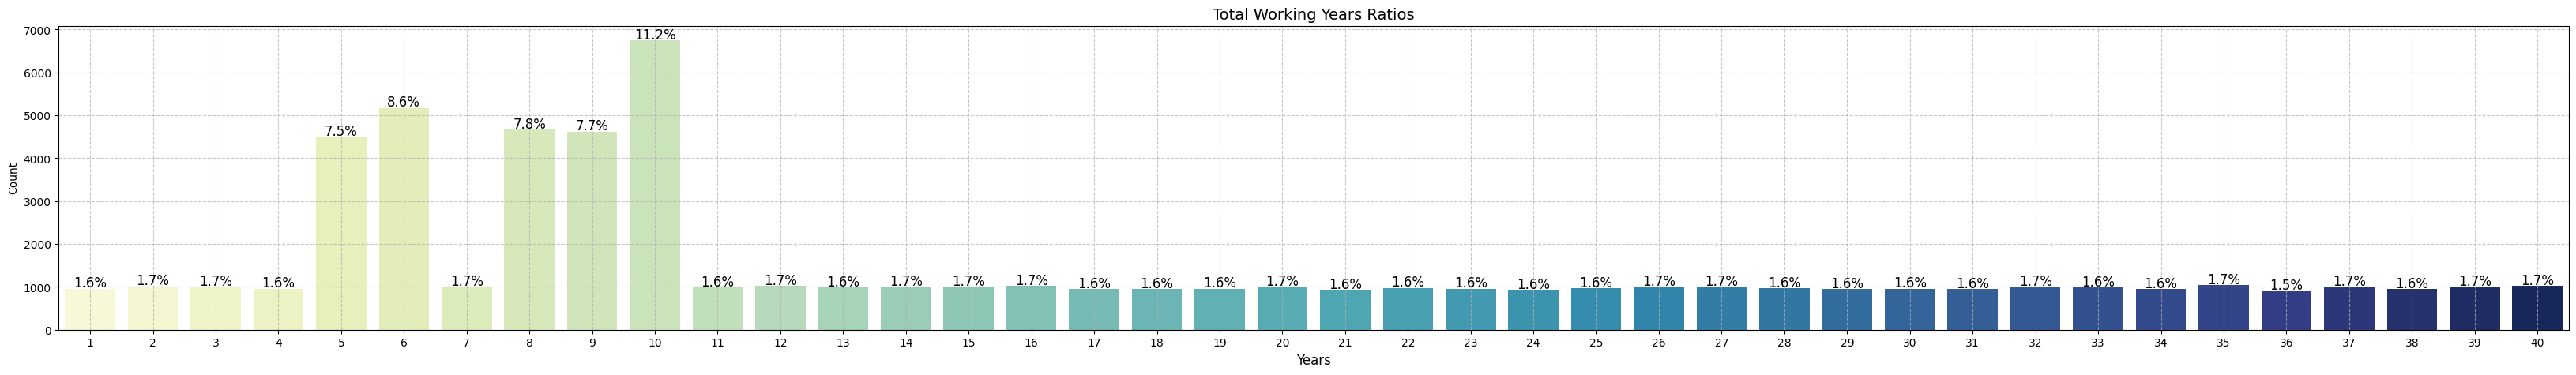

In [268]:
labeled_barplot(final, 'totalworkingyears', perc= True, title= 'Total Working Years Ratios', xlabel= 'Years')

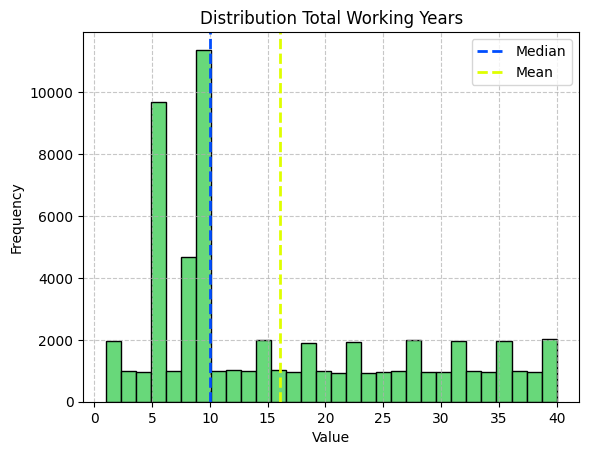

In [269]:
plt.hist(final['totalworkingyears'], bins=30, color= '#68D87A', edgecolor='black')

# get median totalworkingyears
med_tw = final['totalworkingyears'].median()

# add median totalworkingyears line
plt.axvline(med_tw, color='#004DFE', linestyle='dashed', linewidth=2, label='Median')

# add meand total working yours line
mean_tw = final['totalworkingyears'].mean()
plt.axvline(mean_tw, color='#DFFF00', linestyle='dashed', linewidth=2, label='Mean')

# legend
plt.legend()

# grid
plt.grid(True, linestyle='--', alpha=0.7)

# labels
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Total Working Years')
plt.show()

### Training Last Year Analysis

In [270]:
final['trainingtimeslastyear'].value_counts(normalize= True)

trainingtimeslastyear
2    0.469550
3    0.274917
5    0.104917
4    0.099267
6    0.026017
1    0.025333
Name: proportion, dtype: float64

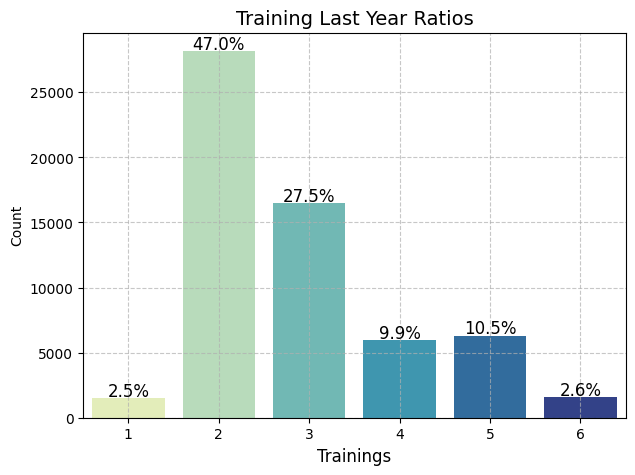

In [271]:
labeled_barplot(final, 'trainingtimeslastyear', perc= True, title= 'Training Last Year Ratios', xlabel= 'Trainings')

### Work Life Balance Anlysis

In [272]:
final['worklifebalance'].value_counts(normalize= True)

worklifebalance
4    0.295033
1    0.292183
2    0.207900
3    0.204883
Name: proportion, dtype: float64

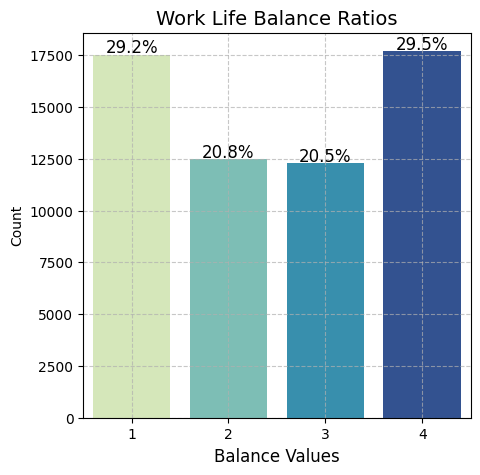

In [273]:
labeled_barplot(final, 'worklifebalance', perc= True, title= 'Work Life Balance Ratios', xlabel= 'Balance Values')

### Years at Company Analysis

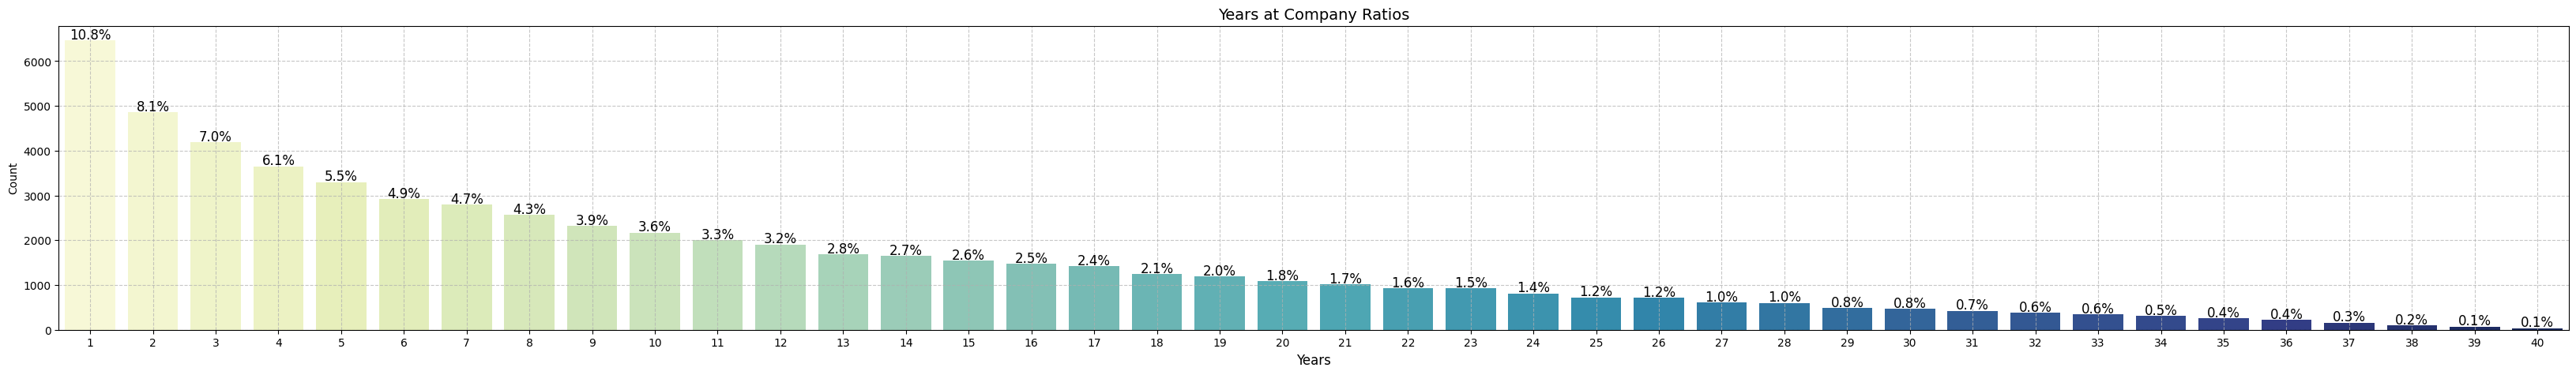

In [274]:
labeled_barplot(final, 'yearsatcompany', perc= True, title= 'Years at Company Ratios', xlabel= 'Years')

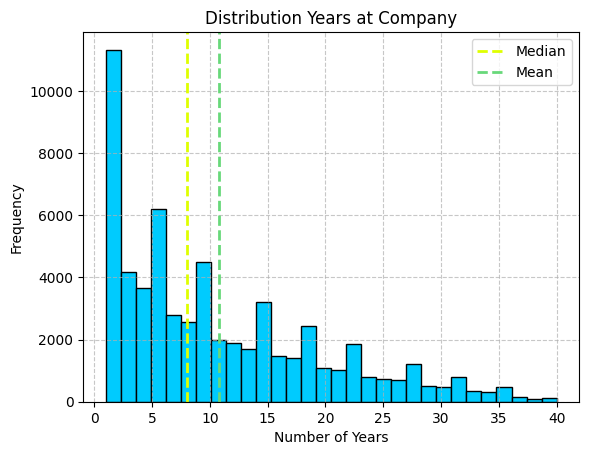

In [275]:
# histogram of years at company
plt.hist(final['yearsatcompany'], bins=30, color= '#00CBFE', edgecolor='black')

# get median and mean
med_years = final['yearsatcompany'].median()
mean_years = final['yearsatcompany'].mean()

# add median and mean lines
plt.axvline(med_years, color='#DFFF00', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_years, color='#68D87A', linestyle='dashed', linewidth=2, label='Mean')

# legend
plt.legend()

# grid
plt.grid(True, linestyle='--', alpha=0.7)

# labels
plt.xlabel('Number of Years')
plt.ylabel('Frequency')
plt.title('Distribution Years at Company')
plt.show()

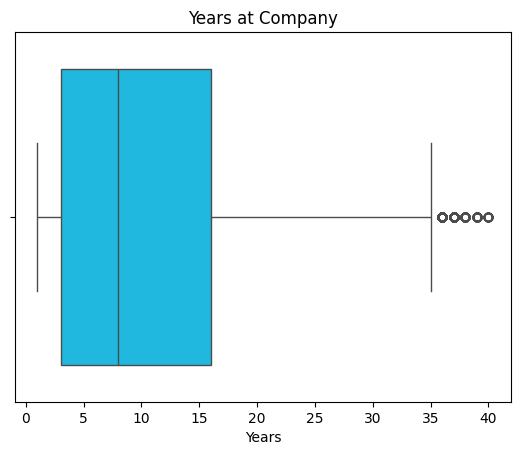

In [276]:
sns.boxplot(x=final['yearsatcompany'], color= '#00CBFE')
plt.title('Years at Company')
plt.xlabel('Years')
plt.show()

### Years in Current Role Analysis

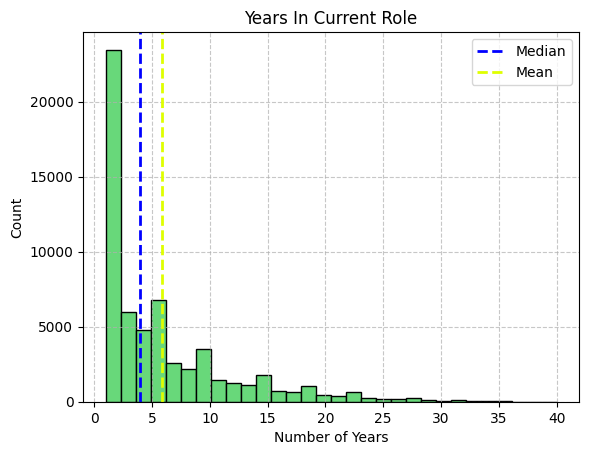

In [277]:
# histogram of years in current role
plt.hist(final['yearsincurrentrole'], bins=30, color= '#68D87A', edgecolor='black')

# get median and mean
med_years = final['yearsincurrentrole'].median()
mean_years = final['yearsincurrentrole'].mean()

# add median and mean lines
plt.axvline(med_years, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_years, color='#DFFF00', linestyle='dashed', linewidth=2, label='Mean')

# legend
plt.legend()

# grid
plt.grid(True, linestyle='--', alpha=0.7)

# labels
plt.xlabel('Number of Years')
plt.ylabel('Count')
plt.title('Years In Current Role')
plt.show()

### Years Since Last Promotion Anlysis

In [278]:
final['yearssincelastpromotion'].value_counts(normalize= True)

yearssincelastpromotion
1     0.312750
0     0.239100
2     0.082900
7     0.049667
4     0.041400
3     0.032300
5     0.031517
12    0.024333
6     0.024133
10    0.023867
8     0.023367
15    0.023333
11    0.023233
9     0.022900
13    0.022667
14    0.022533
Name: proportion, dtype: float64

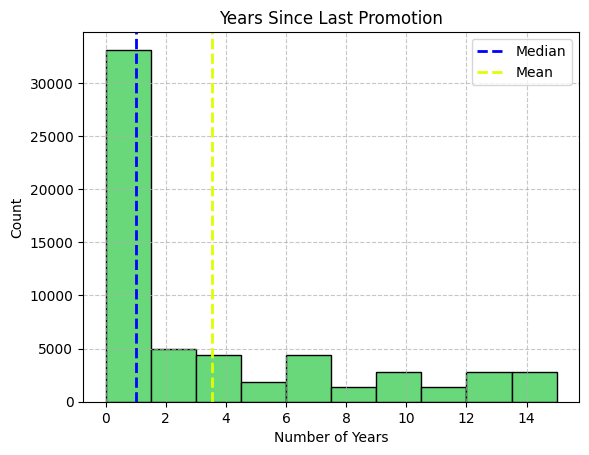

In [279]:
# histogram of years since last promotion
plt.hist(final['yearssincelastpromotion'], color= '#68D87A', edgecolor='black')

# get median and mean
med_years = final['yearssincelastpromotion'].median()
mean_years = final['yearssincelastpromotion'].mean()

# add median and mean lines
plt.axvline(med_years, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_years, color='#DFFF00', linestyle='dashed', linewidth=2, label='Mean')

# legend
plt.legend()

# grid
plt.grid(True, linestyle='--', alpha=0.7)

# labels
plt.xlabel('Number of Years')
plt.ylabel('Count')
plt.title('Years Since Last Promotion')
plt.show()

### Years with Current Manager Analysis

In [280]:
final['yearswithcurrmanager'].value_counts(normalize= True)

yearswithcurrmanager
2     0.271817
0     0.164183
7     0.137883
3     0.092717
8     0.062567
1     0.055033
4     0.054183
9     0.039167
5     0.029467
6     0.021317
12    0.012200
14    0.012183
10    0.012150
11    0.011950
13    0.011700
15    0.011483
Name: proportion, dtype: float64

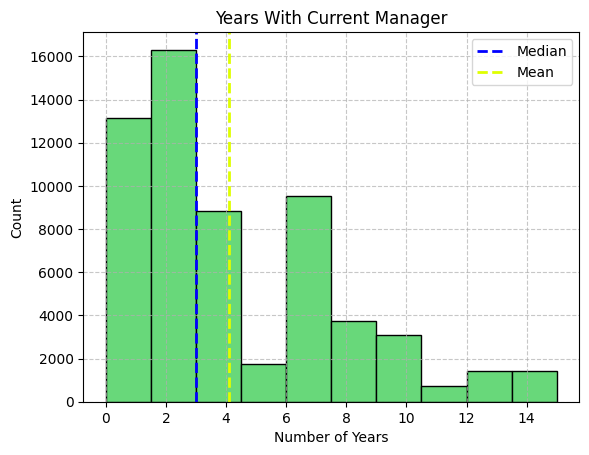

In [281]:
# histogram of years with current manager
plt.hist(final['yearswithcurrmanager'], color= '#68D87A', edgecolor='black')

# get median and mean
med_years = final['yearswithcurrmanager'].median()
mean_years = final['yearswithcurrmanager'].mean()

# add median and mean lines
plt.axvline(med_years, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_years, color='#DFFF00', linestyle='dashed', linewidth=2, label='Mean')

# legend
plt.legend()

# grid
plt.grid(True, linestyle='--', alpha=0.7)

# labels
plt.xlabel('Number of Years')
plt.ylabel('Count')
plt.title('Years With Current Manager')
plt.show()

## Bivariate Analysis

#### Bivariate Analysis Utility Functions

In [391]:
# Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of Attrition=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of Attrition=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="turquoise",
    )

    axs[1, 0].set_title("Boxplot w.r.t Attrition")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="YlGnBu")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t Attrition")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="YlGnBu",
    )

    plt.tight_layout()
    plt.show()

In [283]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

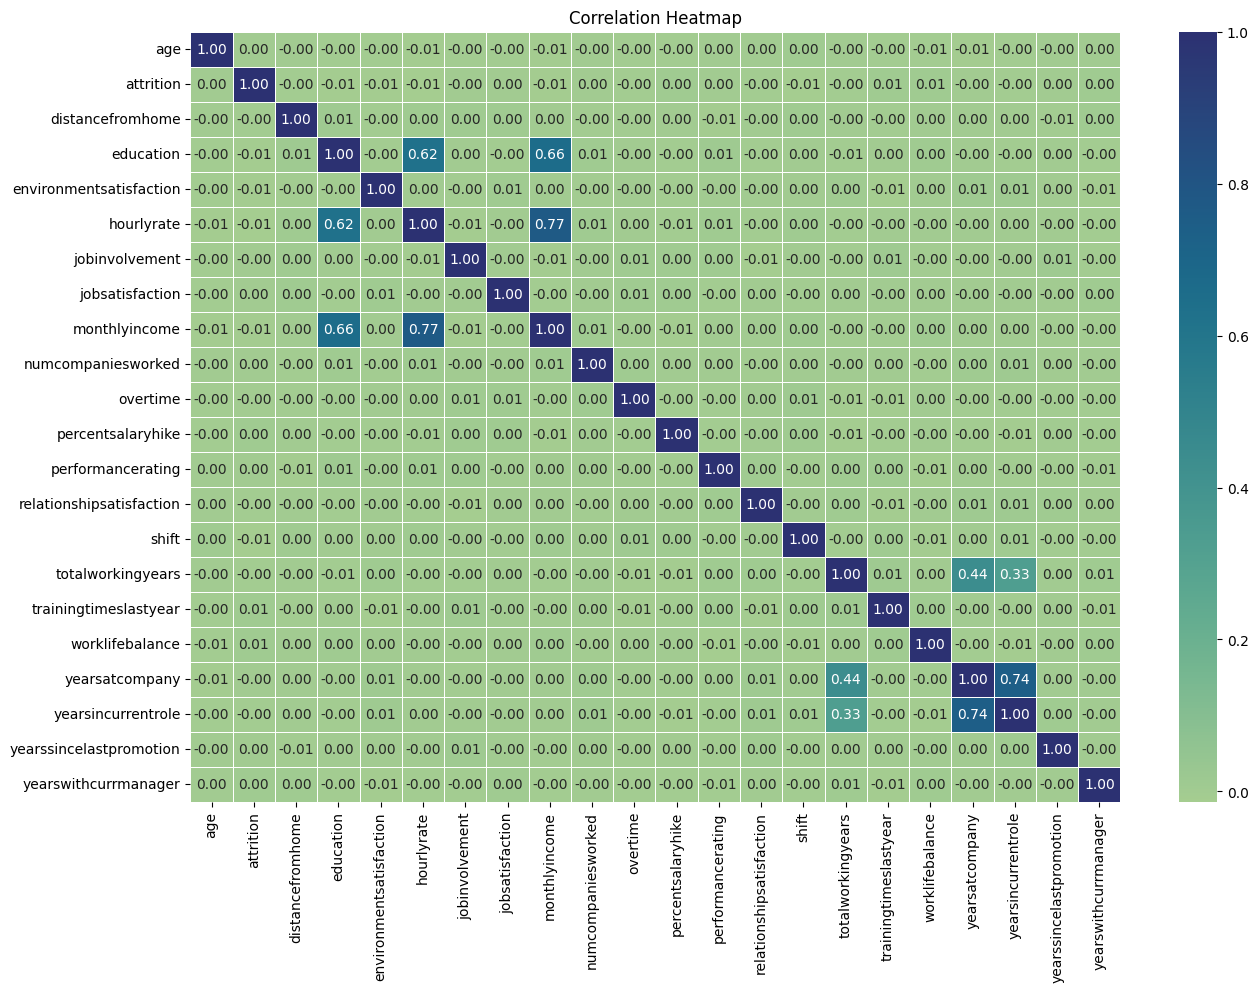

In [284]:
plt.figure(figsize=(15, 10))
sns.heatmap(final.corr(numeric_only=True), annot=True, cmap='crest', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

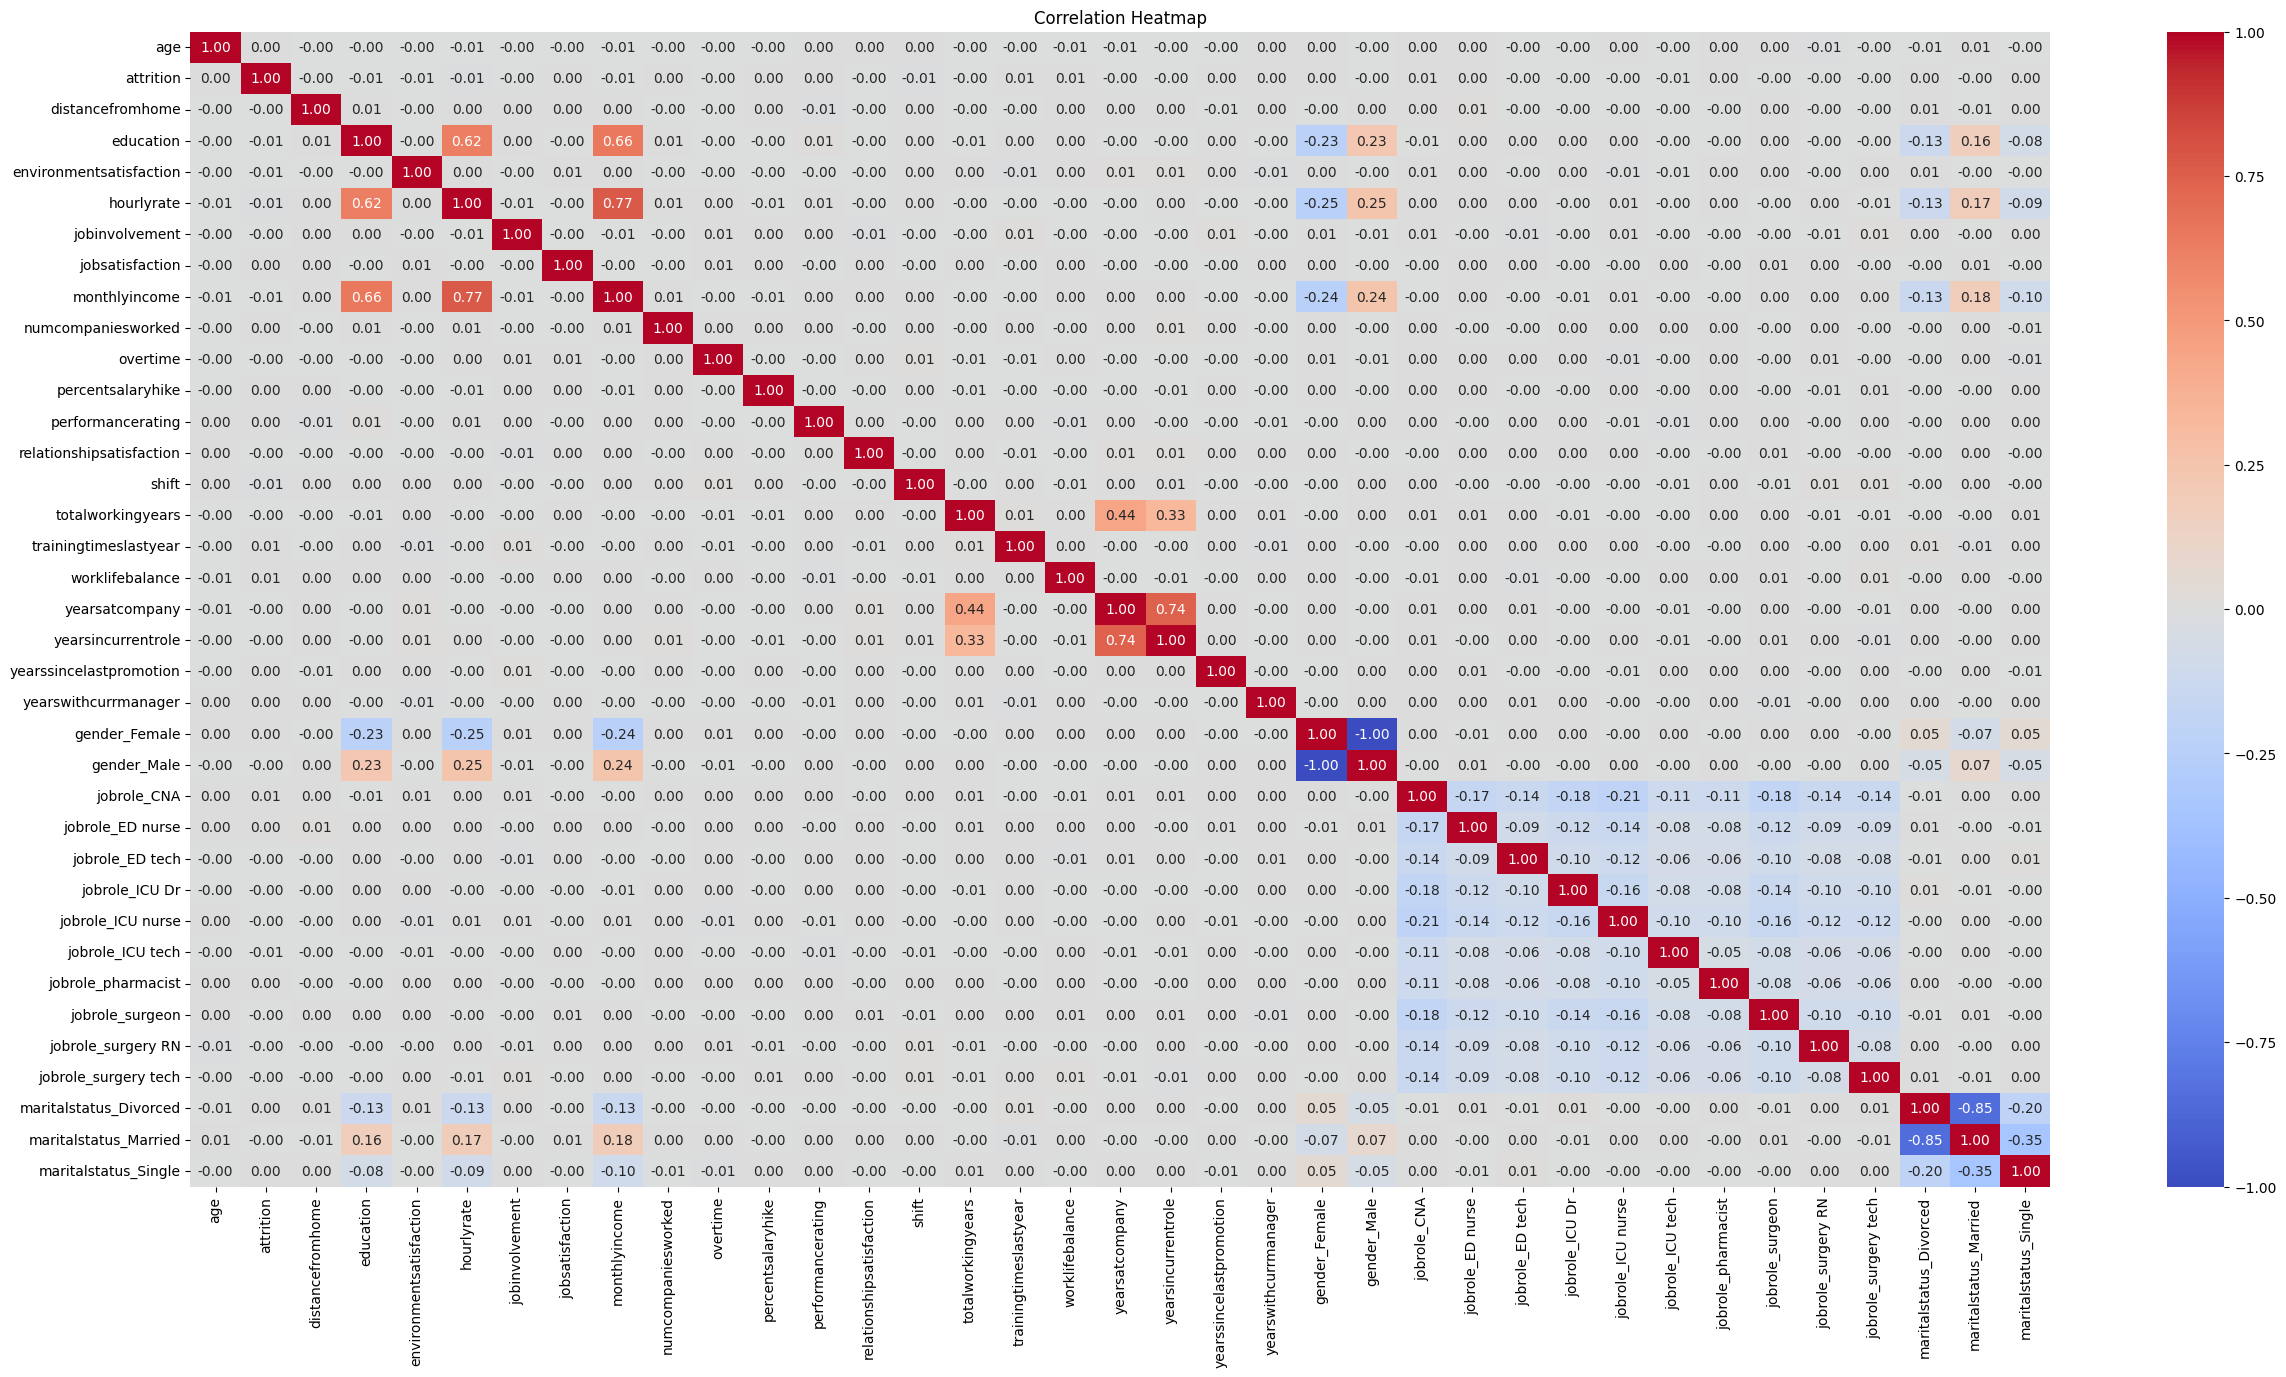

In [285]:
# add in the categorical columns
# convert object columns to numerical using one-hot encoding
df_numerical = pd.get_dummies(final, columns=['gender', 'jobrole', 'maritalstatus'])

# Calculate correlation matrix
correlation_matrix = df_numerical.corr()

# Create heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show();

**Observations:**

- Years at Company and Years in Current Role are highly correlated- 74%. I will likely want to drop one of those columns.
- Monthly Income and Hourly Rate are highly correlated- 77% and both essentially tell us the same thing, so I will be dropping Hourly Rate.
- Monthly Income and Education are also highly correlated, unsurprisingly- 66%. However, both may have an inpact on attrition, so I won't be dropping either column.

## Age and Attrition Analysis

In [318]:
#  get age attritions breakdowns
counts = final.groupby(['age','attrition']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100
percentages

attrition,0,1
age,,
1,69.542709,30.457291
2,78.909578,21.090422
3,89.809735,10.190265
4,89.907435,10.092565
5,90.810347,9.189653
6,88.514813,11.485187
7,82.909793,17.090207
8,74.710816,25.289184
9,70.502392,29.497608


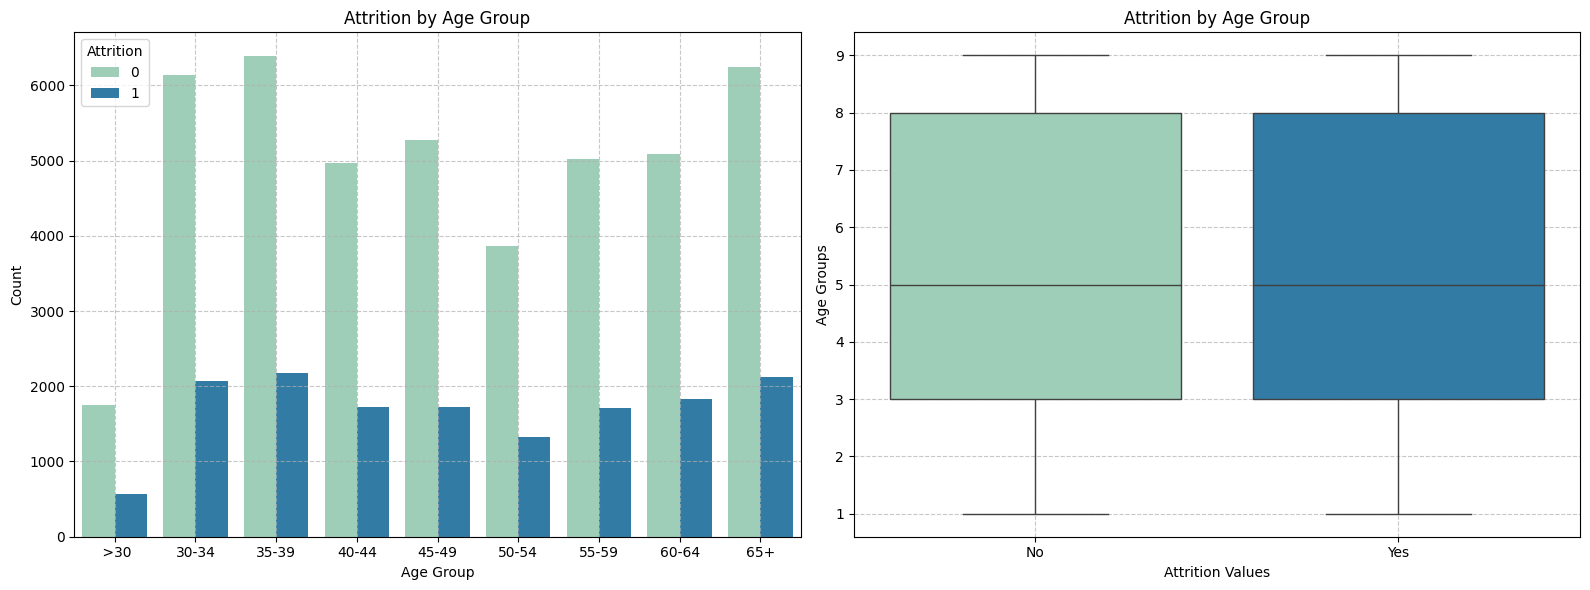

In [377]:
# create subplots
fig, ax = plt.subplots(1,2,figsize=(16, 6))

# countplot
sns.countplot(x='age', hue='attrition', data=final, palette= "YlGnBu", ax=ax[0])

# create custom x-axis labels
labels = [' >30', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+']
ax[0].set_xticklabels(labels)

# set axis labels & titles
ax[0].set_xlabel('Age Group')
ax[0].set_ylabel('Count')
ax[0].set_title('Attrition by Age Group')
ax[0].grid(True, linestyle= '--', alpha= 0.7)
ax[0].legend(title='Attrition')

# box plot
sns.boxplot(x='attrition', y='age', data=final, palette= "YlGnBu", ax=ax[1])
ax[1].set_xlabel('Attrition Values')
ax[1].set_ylabel('Age Groups')
ax[1].set_title('Attrition by Age Group')
ax[1].set_xticklabels(['No', 'Yes'])
ax[1].grid(True, linestyle= '--', alpha= 0.7)

# set layout
plt.tight_layout()
plt.show()

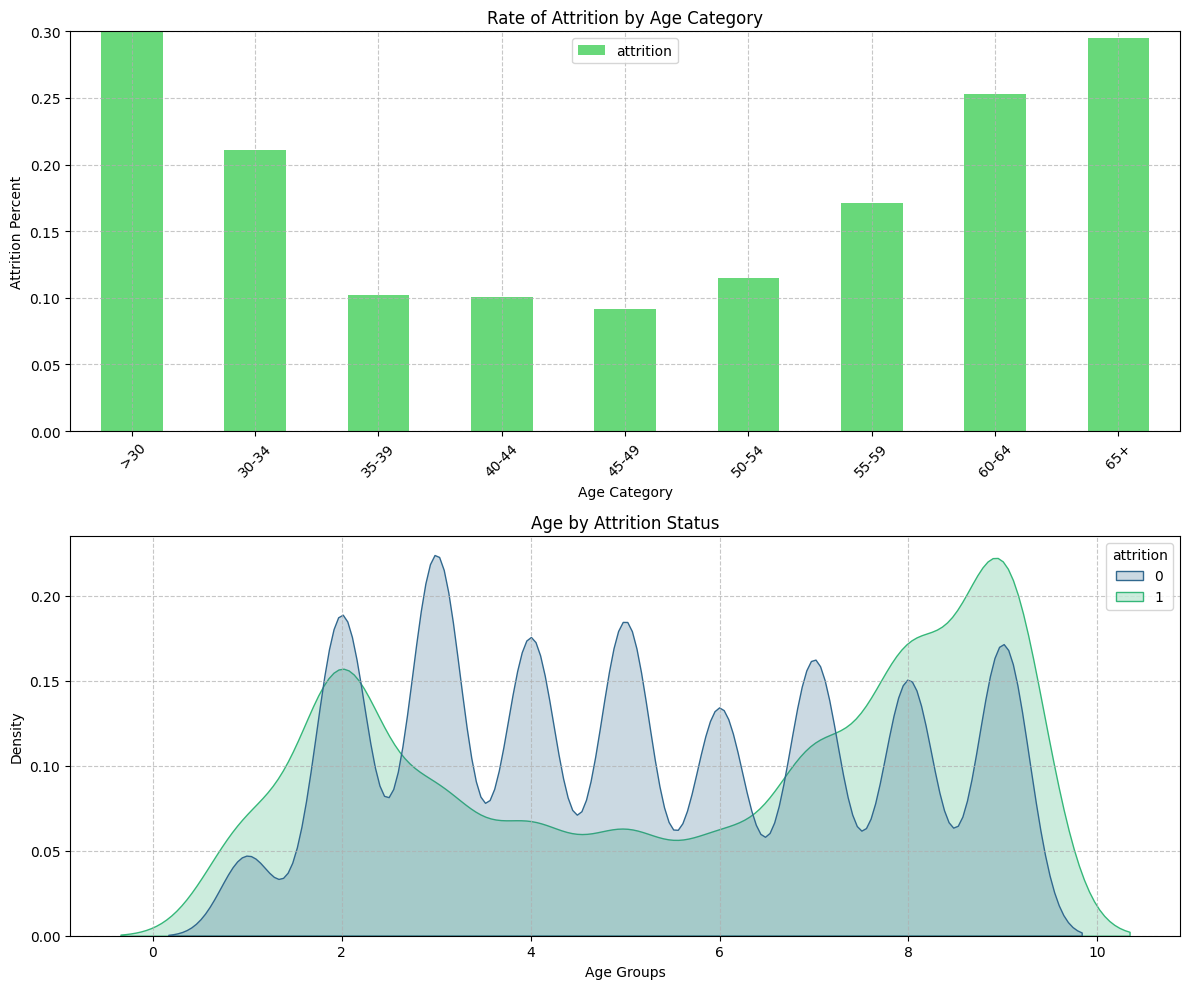

In [320]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the bar chart
age_group_pivot = final.pivot_table(values='attrition', index='age', aggfunc=np.mean)
age_group_pivot.plot(kind='bar', color='#68D87A', ax=ax1)

# Customize x-axis ticks
ticks = range(len(age_group_pivot.index))
labels = [' >30', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+']
ax1.set_xticks(ticks)
ax1.set_xticklabels(labels, rotation=45)

# Set labels and title
ax1.set_xlabel('Age Category')
ax1.set_ylabel('Attrition Percent')
ax1.set_title('Rate of Attrition by Age Category')
ax1.set_ylim([0, 0.3])

# Add grid
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot the KDE plot
sns.kdeplot(data=final, x='age', hue='attrition', palette='viridis', common_norm=False, fill=True, ax=ax2)

# Set labels and title
ax2.set_title('Age by Attrition Status')
ax2.set_xlabel('Age Groups')
ax2.set_ylabel('Density')

# Add grid
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Age Attrition Observations:**


- 33% of hospital staff are 55 and older.
   - That age bracket acounts for about half of all attrition values.
   - With rising US RN shortages, as these employees retire, it will increase the inequality of the nurse to patient ratio.
   - Currently, the nurse to patient ratio in the US is 9 nurses for every 1,000 people.
- The cost of each RN turnover is $56,277 (NSI National Health Care Retention Report). This will be an enormous financial burden on hospitals and clinics needing to replace attrited employees.


**Recommendations:**
- Retirement is unavoidable, so emphasis needs to be placed on retention of the younger staff. Work life balance levels have an impact on attrition rates, so my recommendations are these:
   - Schedule flexibility has been cited in numerous studies (https://www.hhs.gov/surgeongeneral/priorities/health-worker-burnout/index.html) as a key factor to healthcare attrition.
   - MedicalMatch is in a strategic position to promote its platform as a solution to the need for flexible scheduling that will benefit both the hospitals, clinics and staff.

## Attrition by Distance From Home Analysis

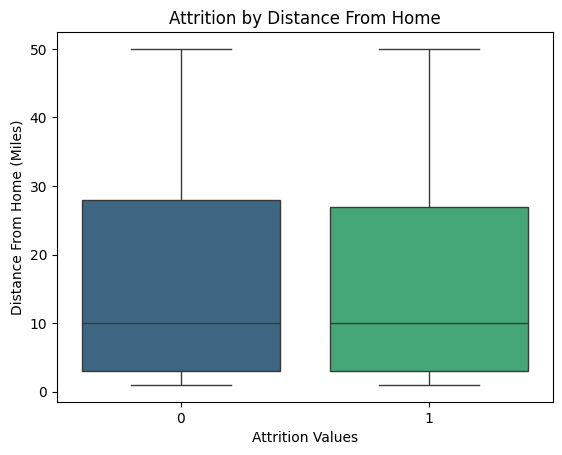

In [289]:
sns.boxplot(x='attrition', y='distancefromhome', data=final, palette='viridis')
plt.xlabel('Attrition Values')
plt.ylabel('Distance From Home (Miles)')
plt.title('Attrition by Distance From Home');

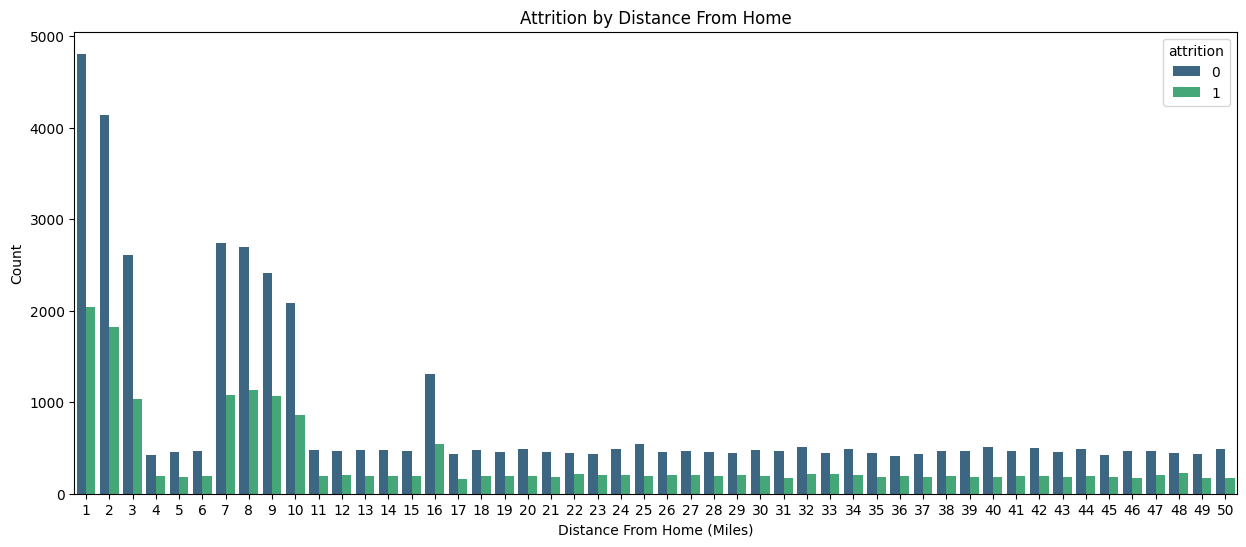

In [290]:
# visualize distance vs attrition
plt.figure(figsize=(15, 6))
sns.countplot(x='distancefromhome', hue='attrition', data=final, palette='viridis')
plt.xlabel('Distance From Home (Miles)')
plt.ylabel('Count')
plt.title('Attrition by Distance From Home')
plt.show()

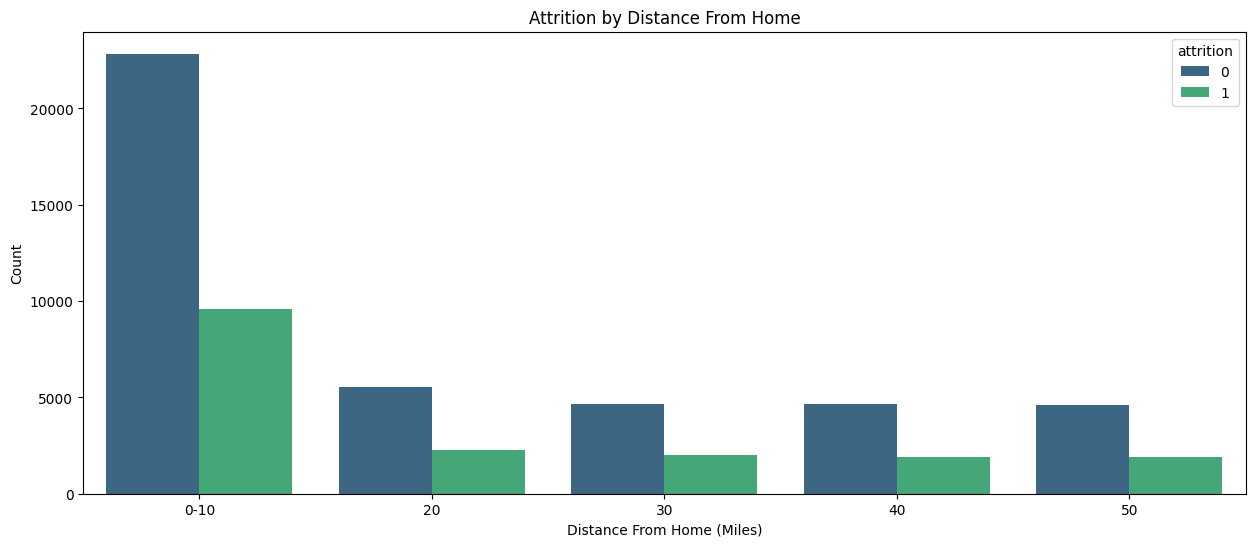

In [291]:
# let's make this a little more consumable
# create bins for distancefromhome
final['distance_bins'] = pd.cut(final['distancefromhome'], bins=[0, 10, 20, 30, 40, 50], labels=['0-10', '20', '30', '40', '50'])

plt.figure(figsize=(15, 6))
sns.countplot(x='distance_bins', hue='attrition', data=final, palette='viridis')

# labels
plt.xlabel('Distance From Home (Miles)')
plt.ylabel('Count')
plt.title('Attrition by Distance From Home')
plt.show()

## Attrition by Education Analysis

In [292]:
#group by education and jobrole

ed_job_cts = final.groupby(['education', 'jobrole']).size().reset_index(name='counts')
ed_job_cts

,education,jobrole,counts
0,1,CNA,1281
1,1,ED nurse,598
2,1,ED tech,430
3,1,ICU Dr,754
4,1,ICU nurse,906
5,1,ICU tech,337
6,1,pharmacist,327
7,1,surgeon,737
8,1,surgery RN,448
9,1,surgery tech,419


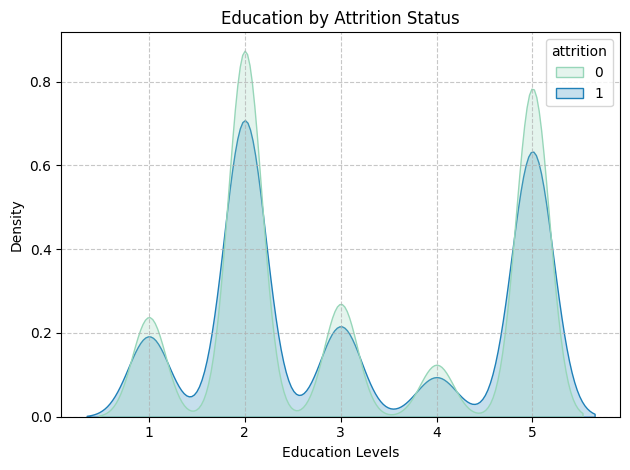

In [378]:
# Plot the KDE plot
sns.kdeplot(data=final, x='education', hue='attrition', palette= "YlGnBu", common_norm=False, fill=True)

# Set labels and title
plt.title('Education by Attrition Status')
plt.xlabel('Education Levels')
plt.ylabel('Density')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Attrition by Environment Satisfaction Analysis

In [295]:
# groupby attrition and environmentalsatisfaction
env_att_cts = final.groupby(['environmentsatisfaction', 'attrition']).size().reset_index(name='counts')
env_att_cts

,environmentsatisfaction,attrition,counts
0,1,0,6712
1,1,1,2899
2,2,0,6770
3,2,1,2817
4,3,0,13523
5,3,1,5679
6,4,0,15320
7,4,1,6280


In [296]:
# get above counts as percentages
total_counts = env_att_cts.groupby('environmentsatisfaction')['counts'].transform('sum')
env_att_cts['counts'] / total_counts * 100

0    69.836646
1    30.163354
2    70.616460
3    29.383540
4    70.424956
5    29.575044
6    70.925926
7    29.074074
Name: counts, dtype: float64

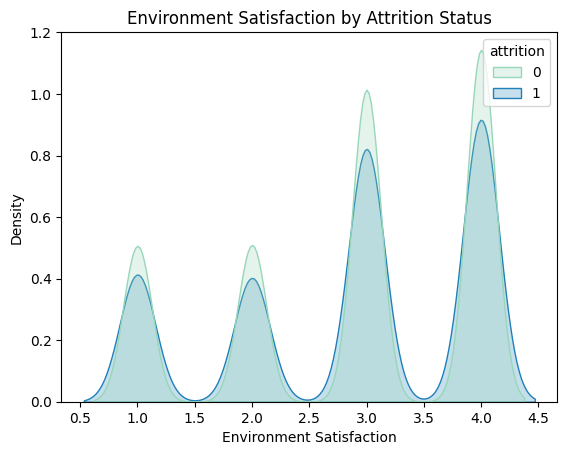

In [396]:
# Plot the KDE plot
sns.kdeplot(data=final, x='environmentsatisfaction', hue='attrition', palette= "YlGnBu", common_norm=False, fill=True)
plt.xlabel('Environment Satisfaction')
plt.ylabel('Density')
plt.title('Environment Satisfaction by Attrition Status')
plt.show();

## Attrition by Gender Analysis

In [398]:
# group gender and attrition then get count
attrition_counts = final.groupby(['gender', 'attrition']).size().reset_index(name='counts')

# results
print(attrition_counts)

   gender  attrition  counts
0  Female          0   30124
1  Female          1   10346
2    Male          0   14625
3    Male          1    4905


In [329]:
# get above counts as percentages
total_counts = attrition_counts.groupby('gender')['counts'].transform('sum')
attrition_counts['counts'] / total_counts * 100

0    82.001483
1    17.998517
2    76.001024
3    23.998976
Name: counts, dtype: float64

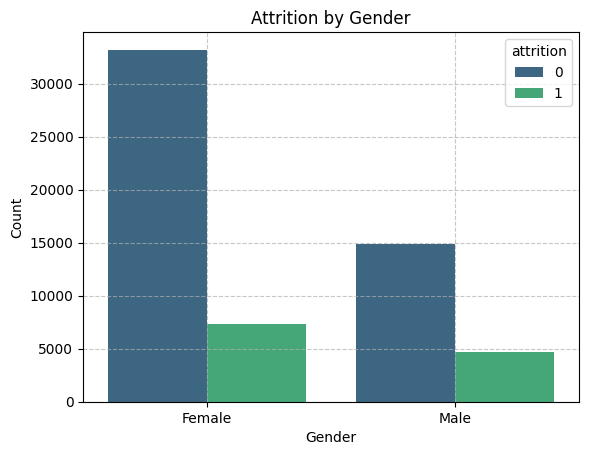

In [331]:
# countplot
sns.countplot(x='gender', hue='attrition', data=final, palette='viridis')

# set axis labels & titles
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Attrition by Gender')
plt.grid(True, linestyle= '--', alpha= 0.7)

**Observations:**

- While men make up a third of this dataset, overall, they are about 7.5% more likely to quit.

**Recommendations:**
- This area could really use a deeper dive if more detailed data can be aquired.

#### Attrition by Age and Gender

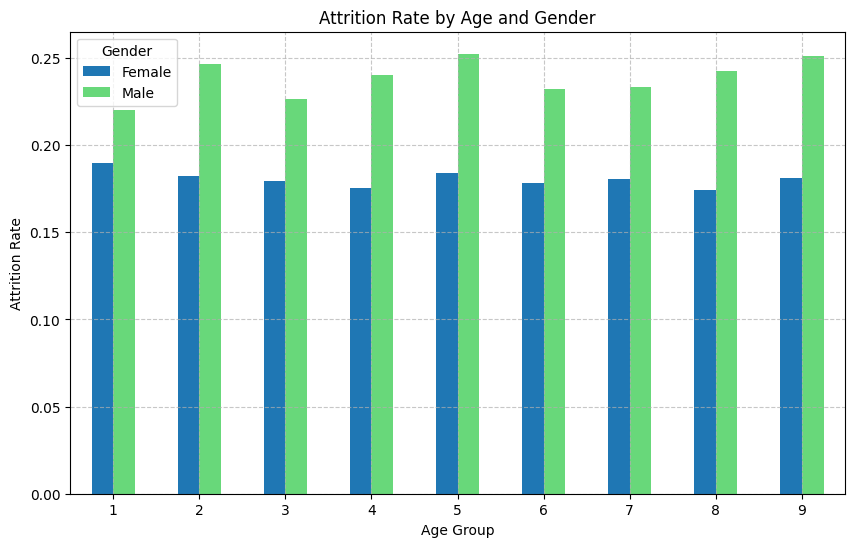

In [332]:
# Grouping by age and gender, then plotting attrition
attrition_by_age_gender = final.groupby(['age', 'gender'])['attrition'].mean().unstack()
attrition_by_age_gender.plot(kind='bar', stacked=False, color=['#1f77b4', '#68D87A'], figsize=(10, 6))
plt.xlabel('Age Group')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Age and Gender')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.show()

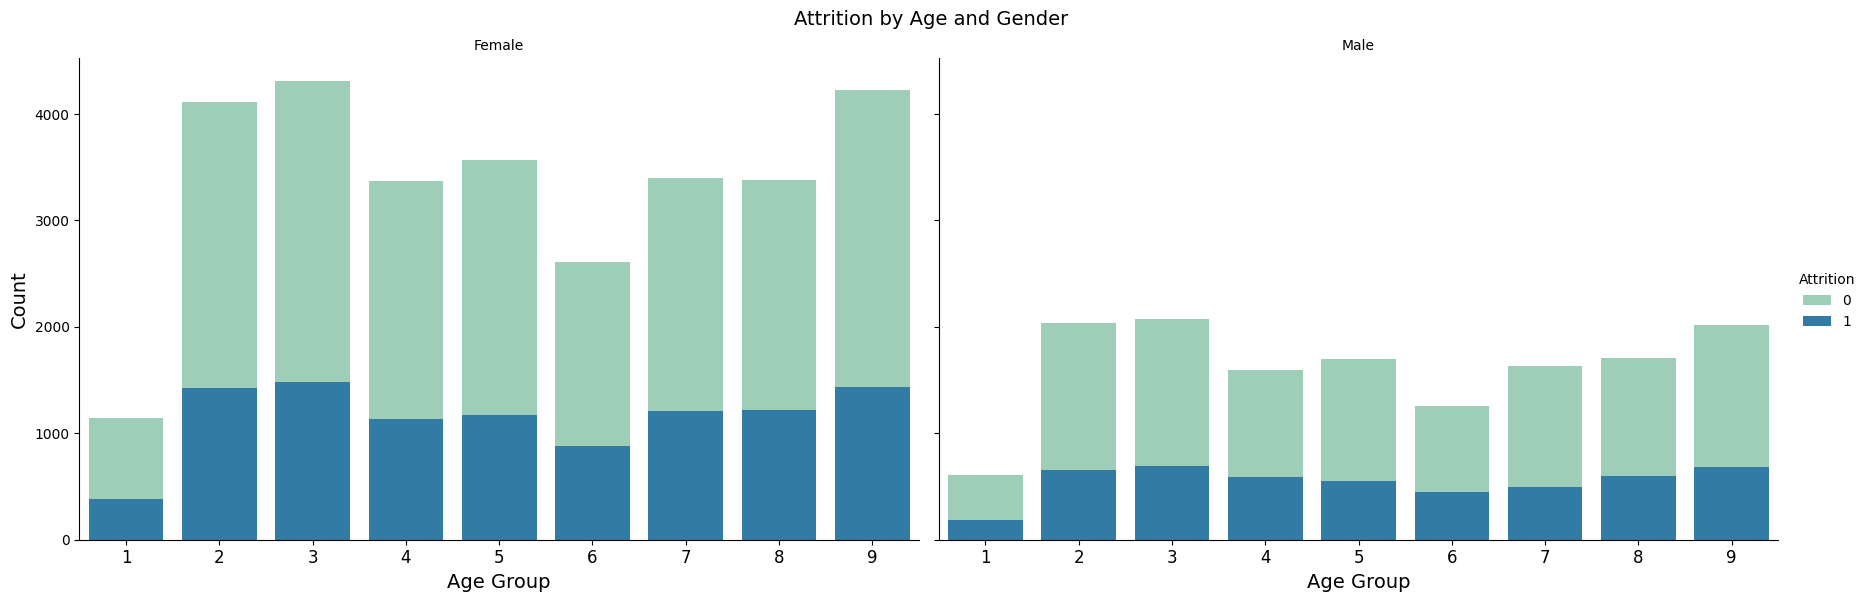

In [379]:
# FacetGrid with attrition by age and gender
g = sns.FacetGrid(final, col="gender", hue="attrition", palette= "YlGnBu", col_wrap=2, height=6, aspect=1.5)
g.map(sns.countplot, "age", order=sorted(final['age'].unique()))
g.set_axis_labels("Age Group", "Count", fontsize= 14)
g.set_titles("{col_name}", fontsize= 14)
g.add_legend(title='Attrition')
g.set_xticklabels(rotation=0, fontsize =12)
plt.subplots_adjust(top=0.9)
plt.suptitle('Attrition by Age and Gender', fontsize= 14)
plt.show()

## Attrition by Job Involvement Analysis

In [303]:
# group gender and attrition then get count
job_inv_att = final.groupby(['jobinvolvement', 'attrition']).size().reset_index(name='counts')

# results
print(job_inv_att)

   jobinvolvement  attrition  counts
0               1          0    4120
1               1          1    1725
2               2          0   11040
3               2          1    4584
4               3          0   23014
5               3          1    9652
6               4          0    4151
7               4          1    1714


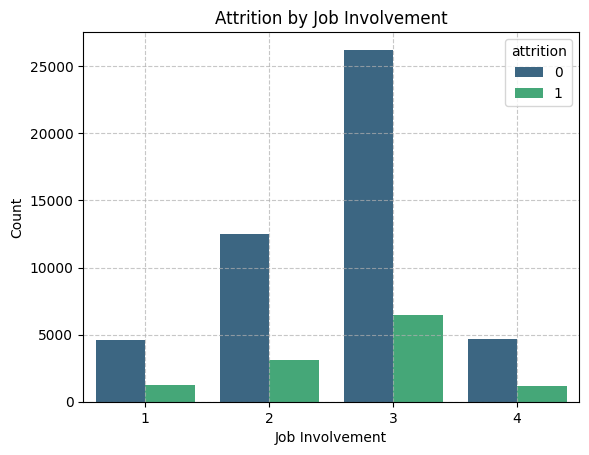

In [368]:
# graph the distribution of the jobinvolment and attrition columns
sns.countplot(x='jobinvolvement', hue='attrition', data=final, palette='viridis')
# labels
plt.xlabel('Job Involvement')
plt.ylabel('Count')
plt.title('Attrition by Job Involvement')
# grid
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Attrition by Job Role Analysis

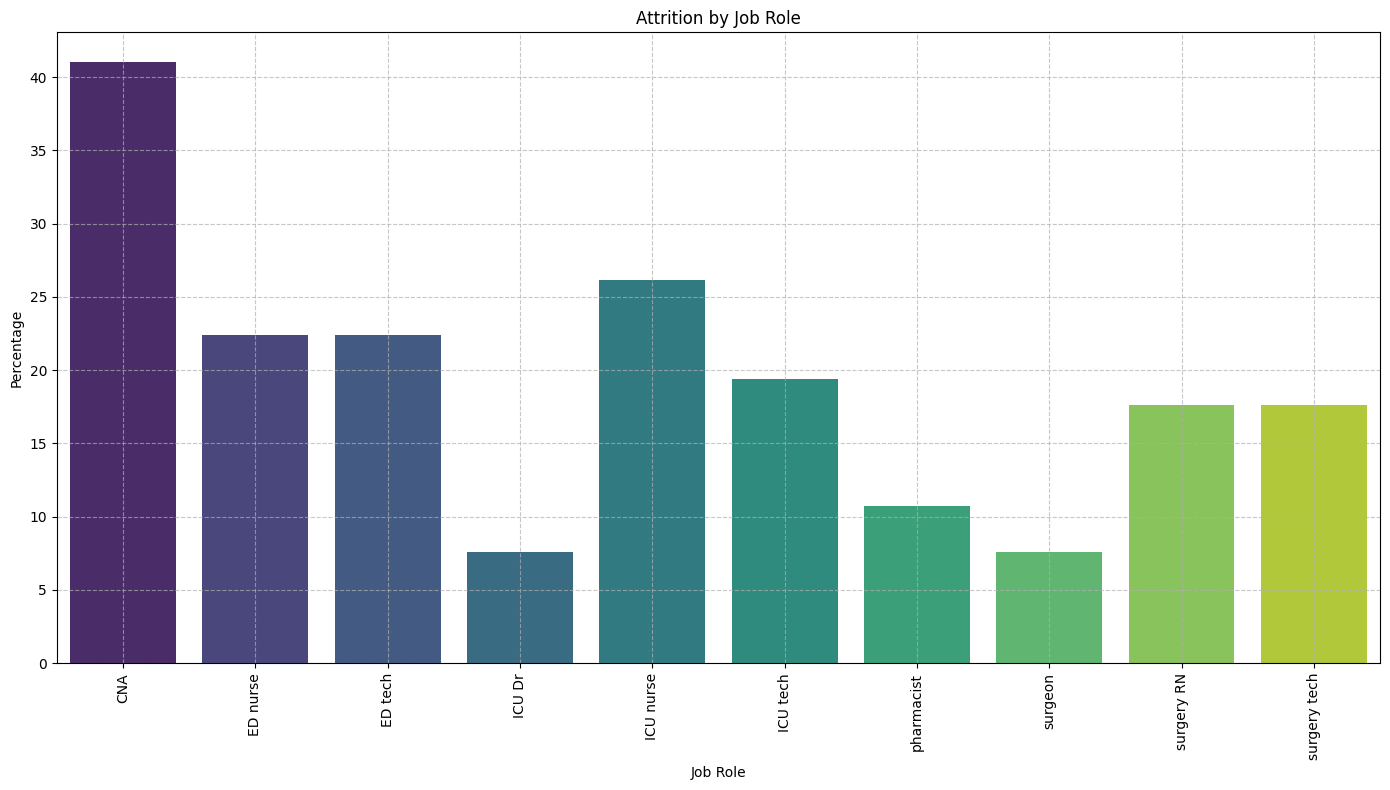

In [464]:
# get percentages for attrition == 1
total_counts = final['jobrole'].value_counts()
attrition_counts = final[final['attrition'] == 1].groupby('jobrole').size().reset_index(name='count')
attrition_counts['percentage'] = attrition_counts.apply(lambda row: row['count'] / total_counts[row['jobrole']] * 100, axis=1)

# barplot
plt.figure(figsize=(14, 8))
sns.barplot(x='jobrole', y='percentage', data=attrition_counts, palette='viridis')

# labels
plt.xlabel('Job Role')
plt.ylabel('Percentage')
plt.title('Attrition by Job Role')
plt.xticks(rotation=90)

# grid
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [454]:
# DISCLOSURE: This isn't my code. I was trying to break down attrition by gender and jobrole
# and couldn't quite get there. This code is from Chatgpt

# group by 'jobrole', 'gender', and 'attrition' and count # of occurrences each
job_role_gender_att = final.groupby(['jobrole', 'gender', 'attrition']).size().reset_index(name='counts')

# total counts for each jobrole and gender
total_counts = final.groupby(['jobrole', 'gender']).size().reset_index(name='total_counts')

# merge totals with grouped data
job_role_gender_att = job_role_gender_att.merge(total_counts, on=['jobrole', 'gender'])

# get the proportion of attrition within each jobrole and gender combination
job_role_gender_att['proportion'] = job_role_gender_att['counts'] / job_role_gender_att['total_counts']

# Print the result
print(job_role_gender_att)

         jobrole  gender  attrition  counts  total_counts  proportion
0            CNA  Female          0    4753          8117    0.585561
1            CNA  Female          1    3364          8117    0.414439
2            CNA    Male          0    2327          3883    0.599279
3            CNA    Male          1    1556          3883    0.400721
4       ED nurse  Female          0    3096          4004    0.773227
5       ED nurse  Female          1     908          4004    0.226773
6       ED nurse    Male          0    1560          1996    0.781563
7       ED nurse    Male          1     436          1996    0.218437
8        ED tech  Female          0    2205          2834    0.778052
9        ED tech  Female          1     629          2834    0.221948
10       ED tech    Male          0    1055          1366    0.772328
11       ED tech    Male          1     311          1366    0.227672
12        ICU Dr  Female          0    4517          4885    0.924667
13        ICU Dr  Fe

**Job Role Attrition Observations**

CNA's have a 40% turnover rate, the highest of any position.
- Per The National Institutes of Health CNA turnover rates range from 55%-100.
- Adjusted for inflation, the cost to replace 1 CNA ranges from 4.6k-16K, plus an additional 3-6K in indirect costs.


Burnout is a common cause of healthcare attrition regardless of position.

- CNA's have the highest patient to caregiver ratio 10/15-to-1. Patient overload can lead to "moral injury" and emotional exhaustion. (relias.com)
  - Moral Injury is a term used in healthcare to describe the guilt provider's feel for not providing the level of care they know the patient needs.

**Recommendations:**

MedicalMatch can save hospitals, clinics and especially nursing homes CNA turnover costs and should consider marketing efforts related to CNA retention.

Per the National Library of Medicine, CNA turnover in nursing homes range from 55%-100%. Further, CNAs are the "most common type of caregiver in nursing homes." This makes them a prime customer base.




## Attrition by Marital Status

In [334]:
# let's get a look at marital attrition rates
final.groupby('attrition')['maritalstatus'].value_counts(normalize=True)

attrition  maritalstatus
0          Married          0.590581
           Divorced         0.332029
           Single           0.077391
1          Married          0.587169
           Divorced         0.334726
           Single           0.078105
Name: proportion, dtype: float64

## Attrition by Monthly Income

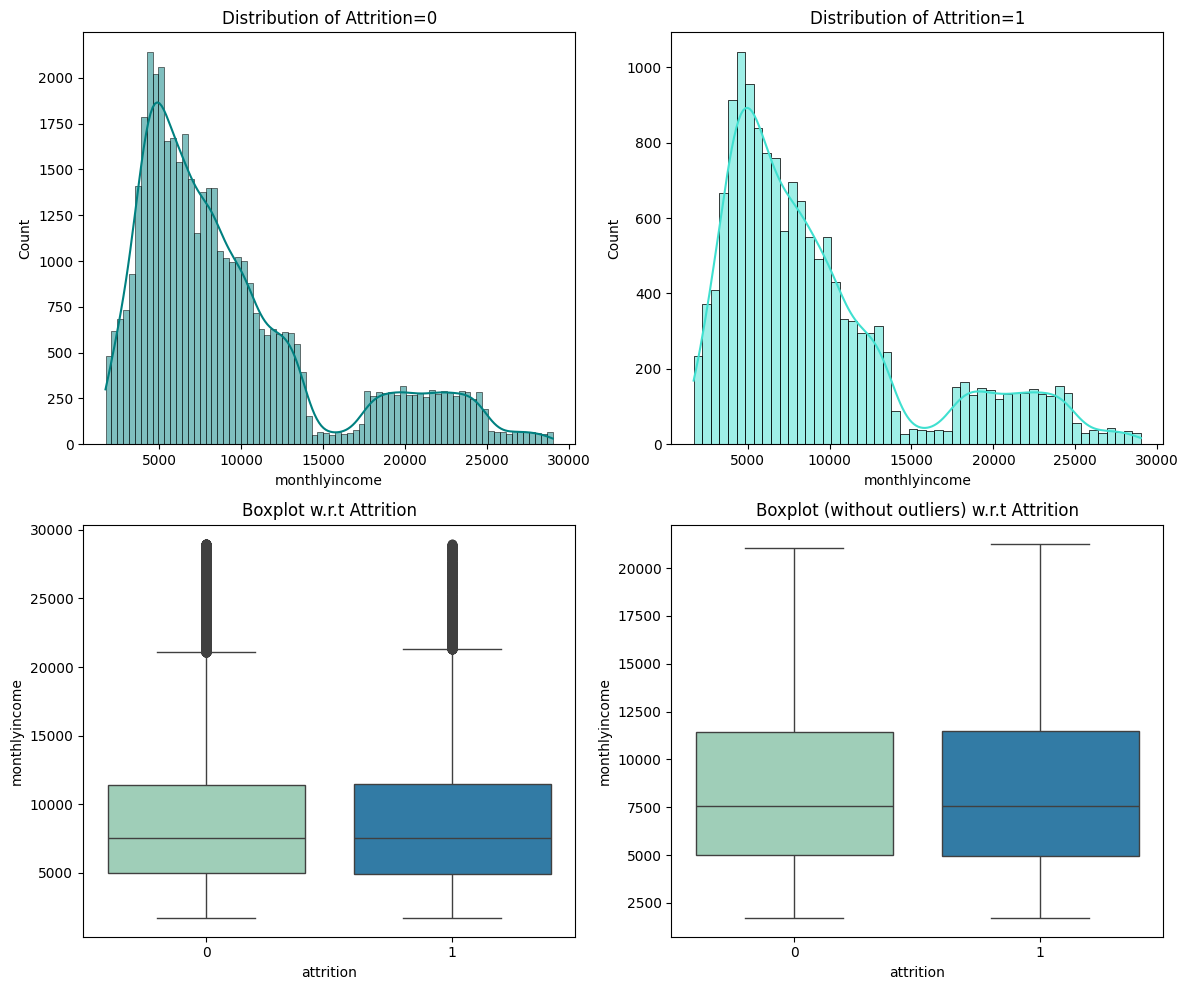

In [392]:
# distribution of Monthly Income to Attrition
distribution_plot_wrt_target(final, 'monthlyincome', 'attrition')

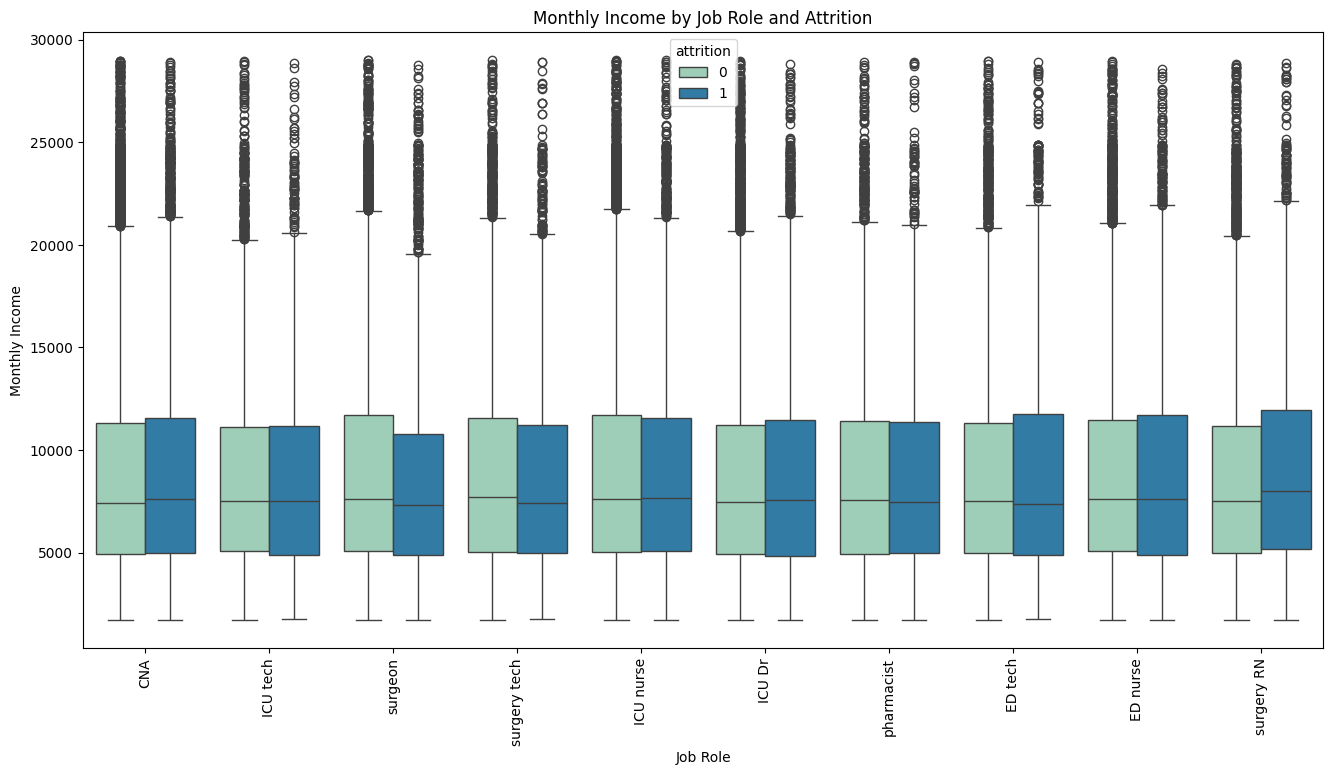

In [400]:
# Set the figure size
plt.figure(figsize=(16, 8))

# Create a box plot
sns.boxplot(data=final, x='jobrole', y='monthlyincome', hue='attrition', palette='YlGnBu')

# Set axis labels and title
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.title('Monthly Income by Job Role and Attrition')
plt.xticks(rotation=90)

# Display the plot
plt.show()


## Attrition by Number of Jobs Held

Text(0.5, 1.0, 'Attrition by Number of Companies Worked')

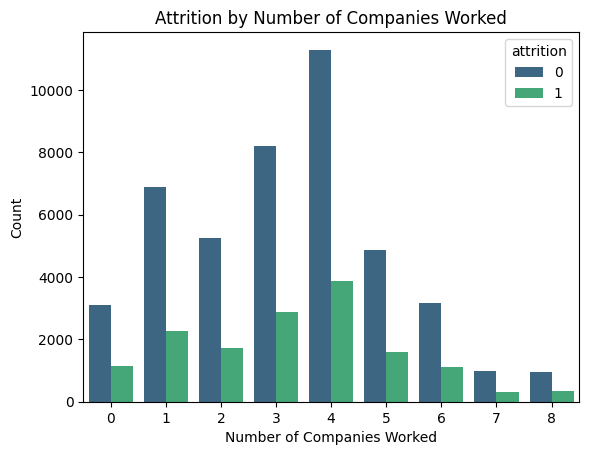

In [408]:
sns.countplot(x='numcompaniesworked', hue='attrition', data=final, palette='viridis')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Count')
plt.title('Attrition by Number of Companies Worked')

## Attrition by Overtime

In [355]:
final.groupby('attrition')['overtime'].value_counts(normalize=True)

attrition  overtime
0          0           0.748027
           1           0.251973
1          0           0.749729
           1           0.250271
Name: proportion, dtype: float64

## Attrition by Performance Rating

In [356]:
final.groupby('attrition')['performancerating'].value_counts(normalize=True)

attrition  performancerating
0          3                    0.482917
           4                    0.187470
           1                    0.171813
           2                    0.157800
1          3                    0.487261
           4                    0.191045
           1                    0.166820
           2                    0.154874
Name: proportion, dtype: float64

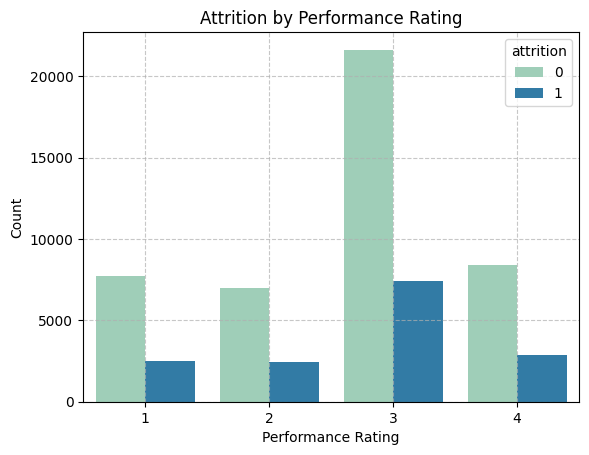

In [381]:
sns.countplot(x='performancerating', hue='attrition', data=final, palette= "YlGnBu")
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.title('Attrition by Performance Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show();

## Attrition by Relationship Satisfaction Analysis

In [373]:
# let's look at the relationship between these to columns, haha, pun totally intended!
final.groupby('attrition')['relationshipsatisfaction'].value_counts(normalize=True)

attrition  relationshipsatisfaction
0          4                           0.354734
           3                           0.271358
           2                           0.256363
           1                           0.117545
1          4                           0.384893
           3                           0.341158
           2                           0.165104
           1                           0.108845
Name: proportion, dtype: float64

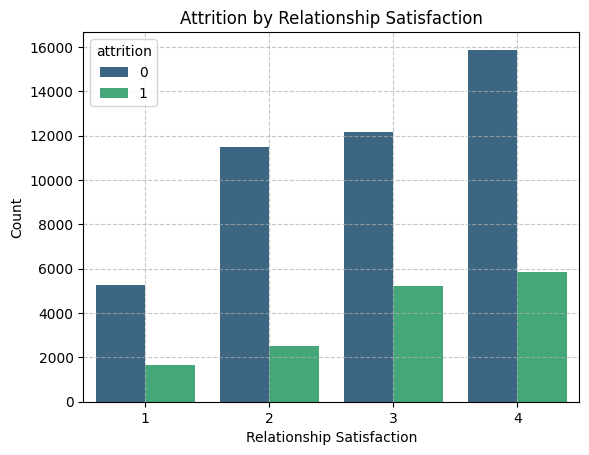

In [370]:
sns.countplot(x='relationshipsatisfaction', hue='attrition', data=final, palette='viridis')
plt.xlabel('Relationship Satisfaction')
plt.ylabel('Count')
plt.title('Attrition by Relationship Satisfaction')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show();

## Attrition by Total Working Years

In [435]:
# group attrition and working years
final.groupby('totalworkingyears')['attrition'].value_counts(normalize=True)

totalworkingyears  attrition
1                  0            0.749216
                   1            0.250784
2                  0            0.748768
                   1            0.251232
3                  0            0.715285
                                  ...   
38                 1            0.280000
39                 0            0.722664
                   1            0.277336
40                 0            0.724708
                   1            0.275292
Name: proportion, Length: 80, dtype: float64

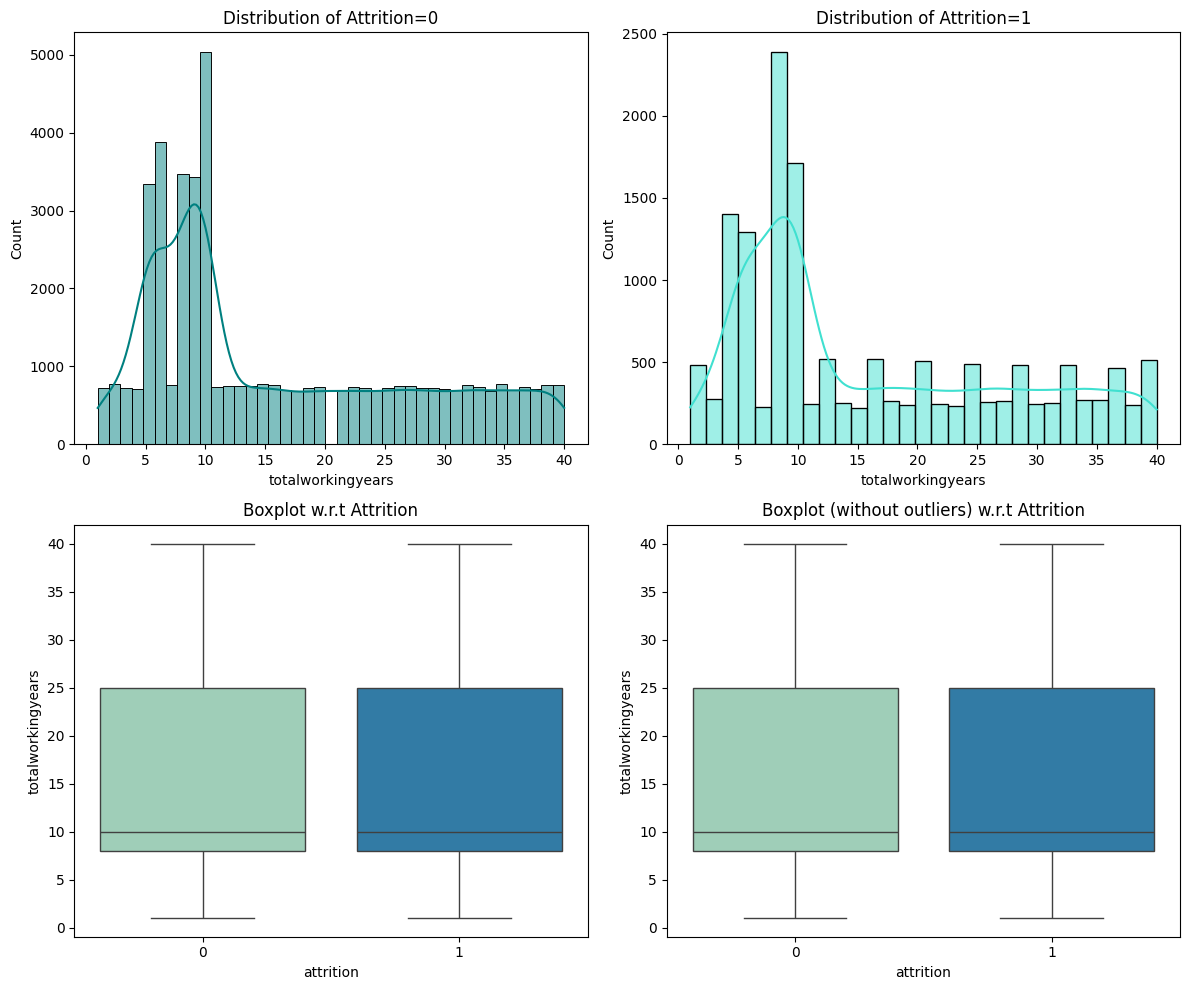

In [409]:
distribution_plot_wrt_target(final, 'totalworkingyears', 'attrition')

## Attrition by Work Life Balance

In [434]:
# let's look at attrition/ WLB values
final.groupby('attrition')['worklifebalance'].value_counts()

attrition  worklifebalance
0          4                  14578
           1                  13149
           3                   8925
           2                   7485
1          2                   4989
           1                   4382
           3                   3368
           4                   3124
Name: count, dtype: int64

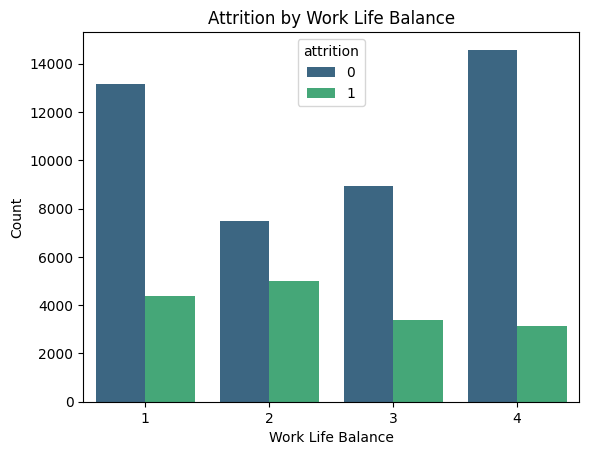

In [427]:
sns.countplot(x='worklifebalance', hue='attrition', data=final, palette='viridis')
plt.xlabel('Work Life Balance')
plt.ylabel('Count')
plt.title('Attrition by Work Life Balance');

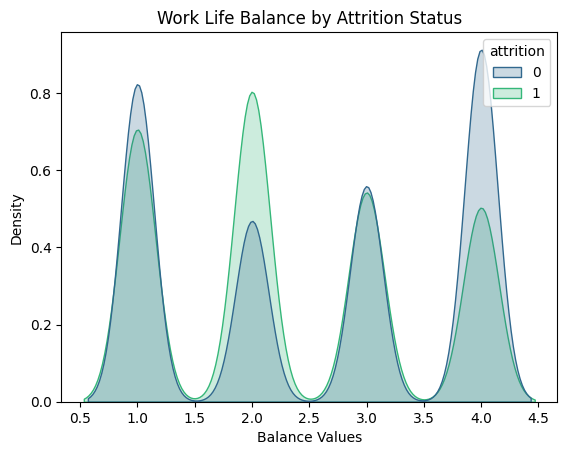

In [432]:
# Plot the KDE plot
sns.kdeplot(data=final, x='worklifebalance', hue='attrition', palette= "viridis", common_norm=False, fill=True)
plt.xlabel('Balance Values')
plt.ylabel('Density')
plt.title('Work Life Balance by Attrition Status')
plt.show();

# Conclussions and Recomendations

## Age Based Attrition Observations and Recommendations


- 33% of hospital staff are 55 and older.
   - That age bracket acounts for about half of all attrition values.
   - With rising US RN shortages, as these employees retire, it will increase the inequality of the nurse to patient ratio.
   - Currently, the nurse to patient ratio in the US is 9 nurses for every 1,000 people.
- The cost of each RN turnover is $56,277 (NSI National Health Care Retention Report). This will be an enormous financial burden on hospitals and clinics needing to replace attrited employees.


**Recommendations:**
- Retirement is unavoidable, so emphasis needs to be placed on retention of the younger staff. Work life balance levels have an impact on attrition rates, so my recommendations are these:
   - Schedule flexibility has been cited in numerous studies (https://www.hhs.gov/surgeongeneral/priorities/health-worker-burnout/index.html) as a key factor to healthcare attrition.
   - MedicalMatch is in a strategic position to promote its platform as a solution to the need for flexible scheduling that will benefit both the hospitals, clinics and staff.

## Gender Attrition Observations and Recommendations

- While men make up a third of this dataset, overall, they are about 7.5% more likely to quit.

**Recommendations:**
- This area could really use a deeper dive if more detailed data can be aquired.

## Job Change Observations And recommendations

- More than 22% of hospital staff have worked at 5+ companies.

**Recommendations:**
This level of turnover illustrates a market need for MedicalMatch's staffing solutions.

- Per the American Medical Association, the costs to replace a doctor is $500k-1M per doctor from recruitment costs, sign-on bonuses, lost billings and onboarding costs. Not to mention indirect costs such as medical errors, higher malpractice risks, etc.
    - Example: If nothing is done to address burnout, Stanford Medicine projects that they could lose up to 60 physicians, a cost ranging from $15.5M-55.5M depending on the specialties of the physicians

- Per the National Health Care Retention & RN Staffing Report, the cost to replace one nurse is $56k.
    - Example: Per NSI for every 20 travel nurses eliminated, the average hospital can save $2M

## Job Role Attrition Observations and Recommendations

CNA's have a 40% turnover rate, the highest of any position.
- Per The National Institutes of Health CNA turnover rates range from 55%-100.
- Adjusted for inflation, the cost to replace 1 CNA ranges from 4.6k-16K, plus an additional 3-6K in indirect costs.


Burnout is a common cause of healthcare attrition regardless of position.

- CNA's have the highest patient to caregiver ratio 10/15-to-1. Patient overload can lead to "moral injury" and emotional exhaustion. (relias.com)
  - Moral Injury is a term used in healthcare to describe the guilt provider's feel for not providing the level of care they know the patient needs.

**Recommendations:**

MedicalMatch can save hospitals, clinics and especially nursing homes CNA turnover costs and should consider marketing efforts related to CNA retention.

Per the National Library of Medicine, CNA turnover in nursing homes range from 55%-100%. Further, CNAs are the "most common type of caregiver in nursing homes." This makes them a prime customer base.

## Work Life Balance Attrition Observations and Recommendations

- Unsurprisingly, 76% of hospital employees who rated their work life balance as Poor - Moderate ended up quitting.

**Recommendation**

- Burnout caused by stress, long working hours and excessive workloads due to patient-to-employee ratios are known drive healthcare workers to change jobs or leave the field altogether. This then increases the workload further for the remaining employees.
    - I recommend further research on which of these factors have the strongest correlation to attrition and initiate policies and procedures to help mitigate them. An initial option could be giving staff greater flexibility with thier schedules.